<a href="https://www.kaggle.com/code/sagarkanade721/bikesharing-linear-polynomial-elasticnet-lasso-eda?scriptVersionId=99698990" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### --- EDA ---

In [475]:
df=pd.read_csv('../input/bike-sharing-dataset/day.csv')

In [476]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [478]:
#Converting dteday into 'date-time' object:

df['dteday']=pd.to_datetime(df['dteday'])

In [479]:
df=df.drop('instant',axis=1)

In [480]:
obj_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [481]:
for col in obj_cols:
    df[col]=df[col].astype(str)

In [482]:
seasons={'1':'springer', '2':'summer', '3':'fall', '4':'winter'}

In [483]:
df['season']=df['season'].map(seasons)

In [484]:
year={'0': '2018', '1':'2019'}

In [485]:
df['yr']=df['yr'].map(year)

In [486]:
holidays={'0':'No holiday','1':'Holiday'}

In [487]:
df['holiday']=df['holiday'].map(holidays)

In [488]:
workingday={'1':'workingday','0':'Non_working_day'}

In [489]:
df['workingday']=df['workingday'].map(workingday)

In [490]:
weathersit_list={'1':['Clear', 'Few clouds', 'Partly cloudy', 'Partly cloudy'],
                 '2': ['Mist + Cloudy', 'Mist + Broken clouds', 'Mist + Few clouds', 'Mist'],
                 '3': ['Light Snow', 'Light Rain + Thunderstorm + Scattered clouds', 'Light Rain + Scattered clouds'],
                 '4':['Heavy Rain + Ice Pallets + Thunderstorm + Mist', 'Snow + Fog']}

In [491]:
weathersit={'1':'Clear','2':'Mist','3':'Light Snow','4':'Heavy Rain'}

In [492]:
df['weathersit']=df['weathersit'].map(weathersit)

In [493]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,springer,2018,1,No holiday,6,Non_working_day,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,springer,2018,1,No holiday,0,Non_working_day,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,springer,2018,1,No holiday,1,workingday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,springer,2018,1,No holiday,2,workingday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,springer,2018,1,No holiday,3,workingday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [494]:
cat_df_obj=df[['season','yr','mnth','holiday','weekday','workingday','weathersit']]

In [495]:
cat_df_obj

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,springer,2018,1,No holiday,6,Non_working_day,Mist
1,springer,2018,1,No holiday,0,Non_working_day,Mist
2,springer,2018,1,No holiday,1,workingday,Clear
3,springer,2018,1,No holiday,2,workingday,Clear
4,springer,2018,1,No holiday,3,workingday,Clear
...,...,...,...,...,...,...,...
725,springer,2019,12,No holiday,4,workingday,Mist
726,springer,2019,12,No holiday,5,workingday,Mist
727,springer,2019,12,No holiday,6,Non_working_day,Mist
728,springer,2019,12,No holiday,0,Non_working_day,Clear


In [496]:
cat_cols=cat_df_obj.columns

In [497]:
cat_cols

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

-----------
Countplot

In [498]:
def countplot(cat_cols):
    
    for col in cat_cols:
        plt.figure(figsize=(20,7),dpi=150)
        sns.countplot(x=df[col])   

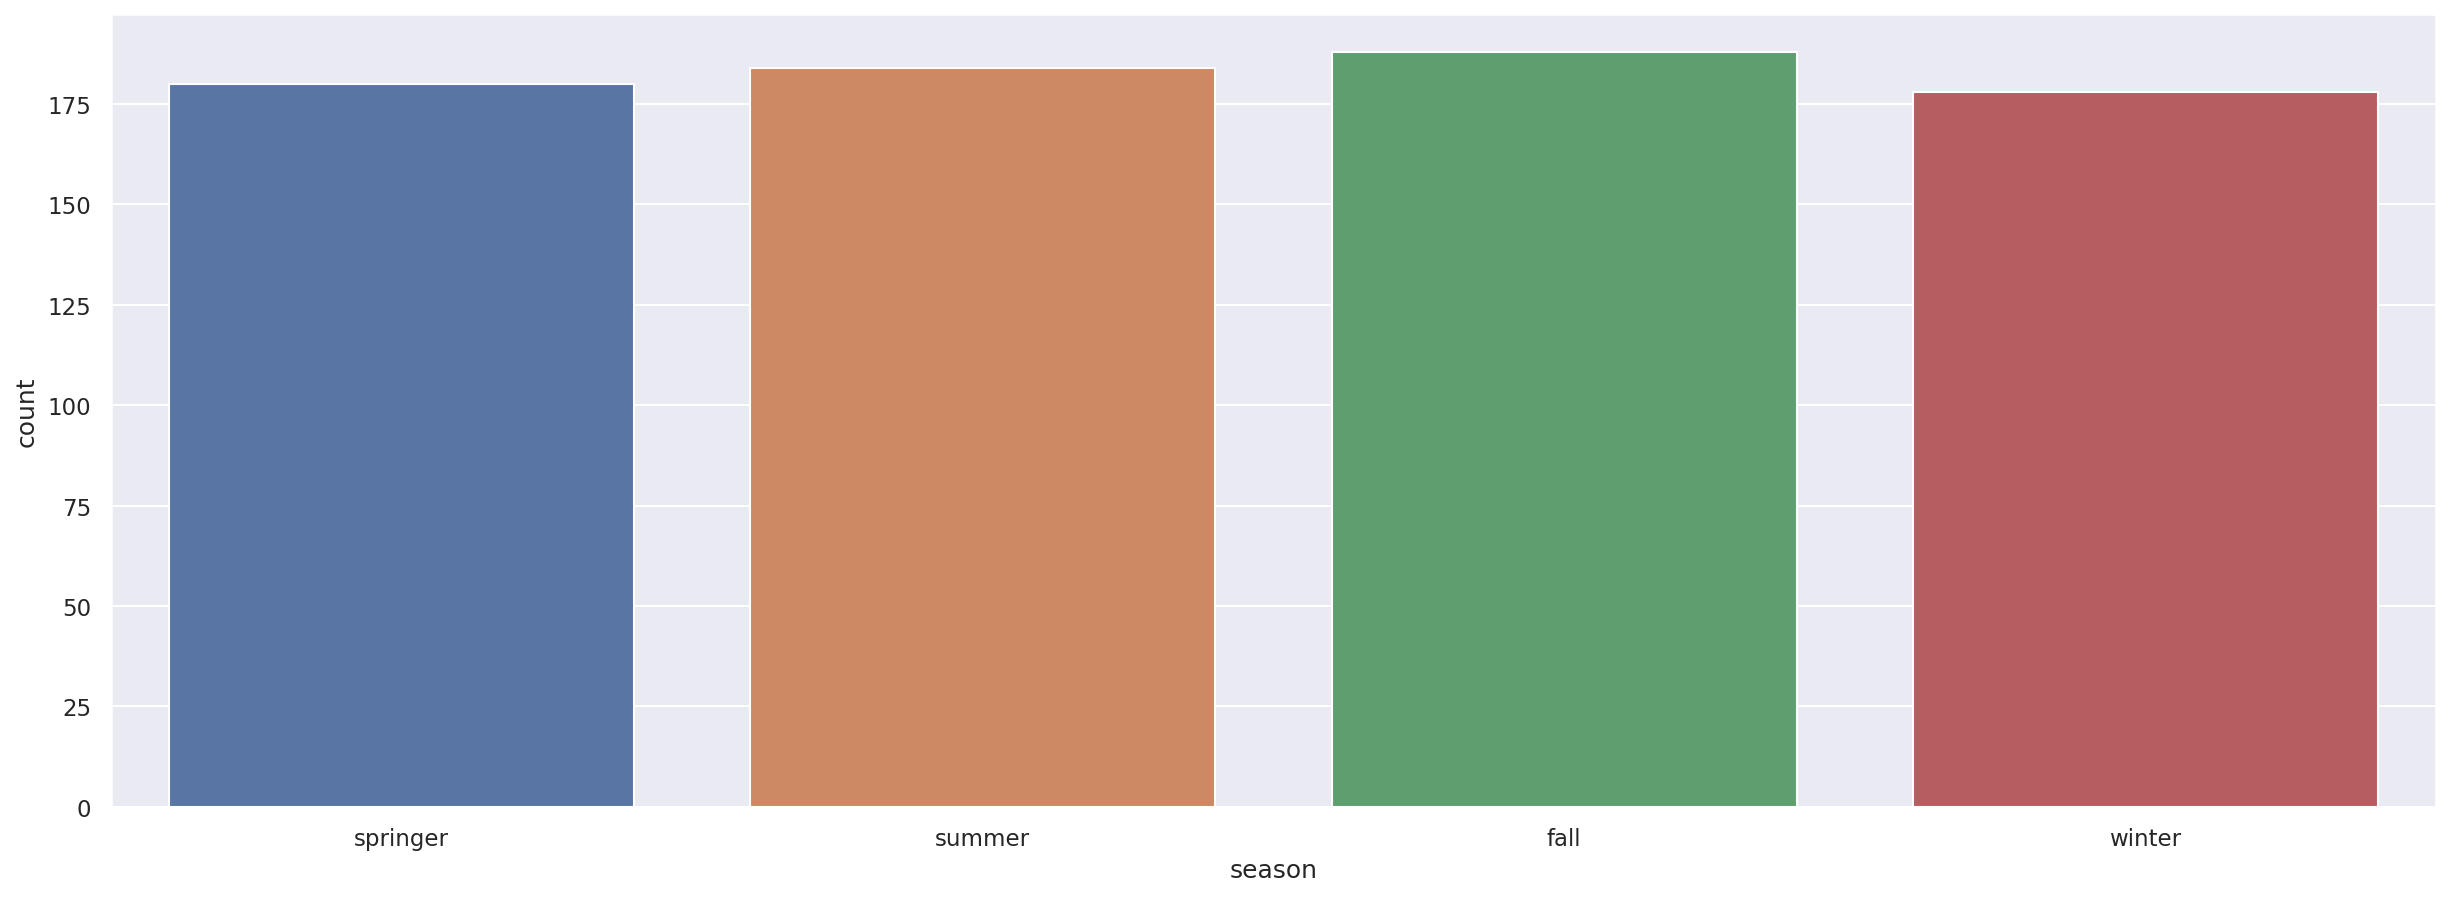

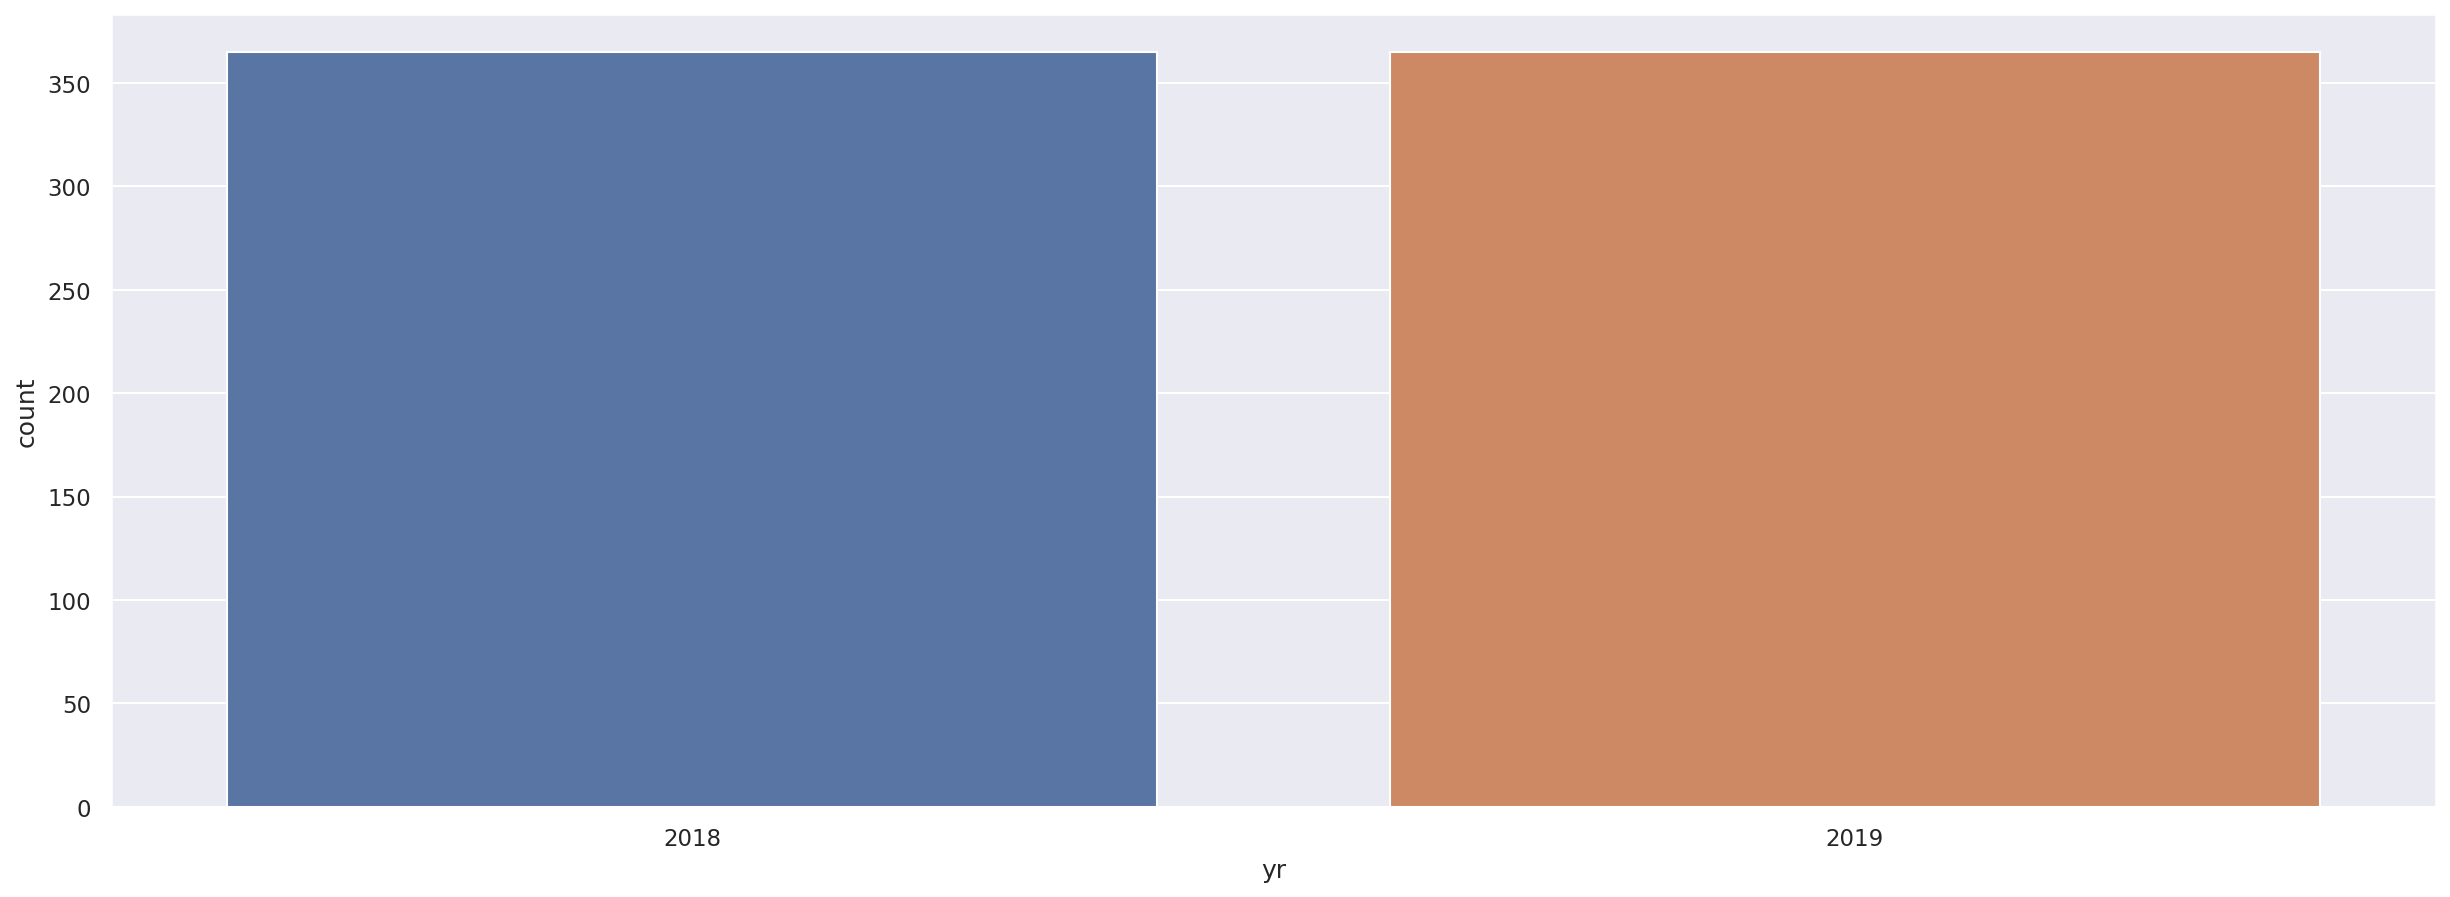

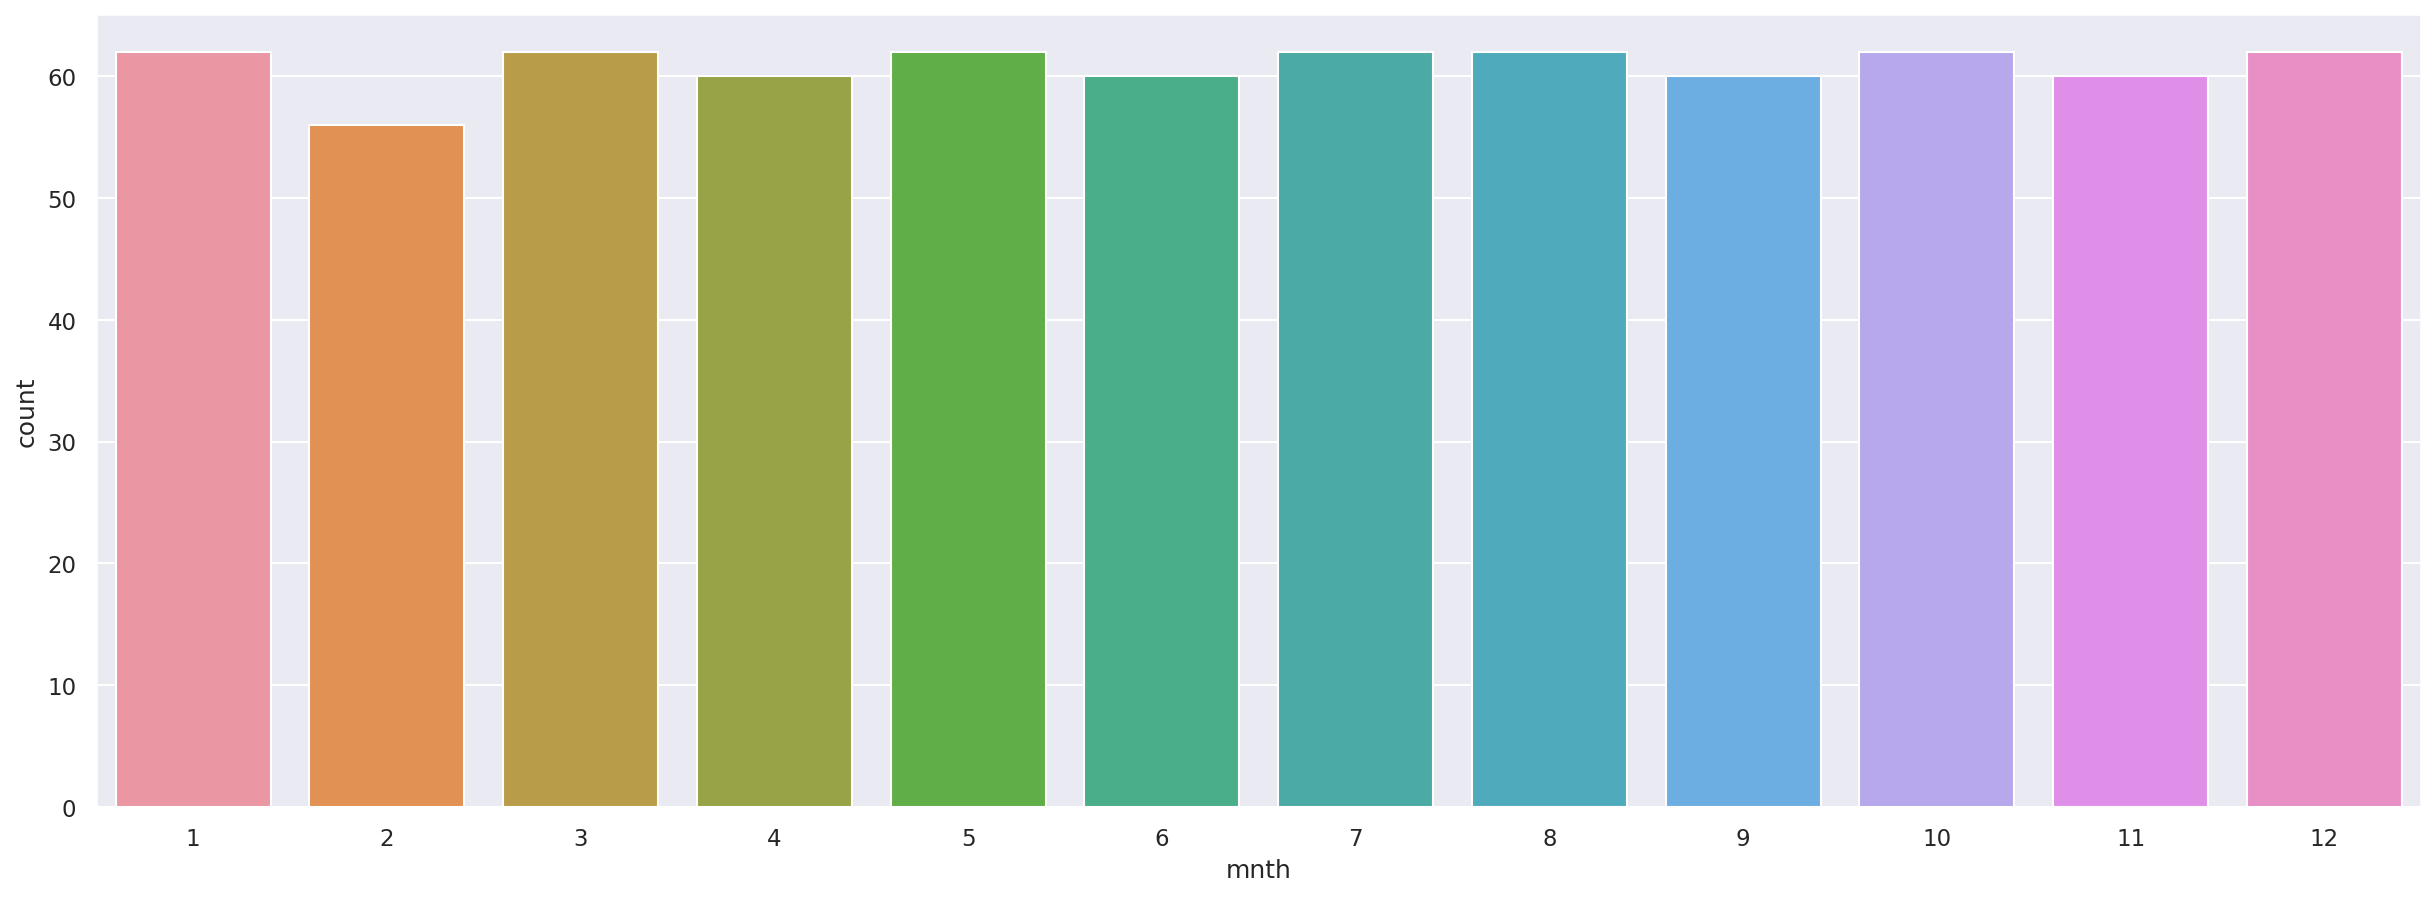

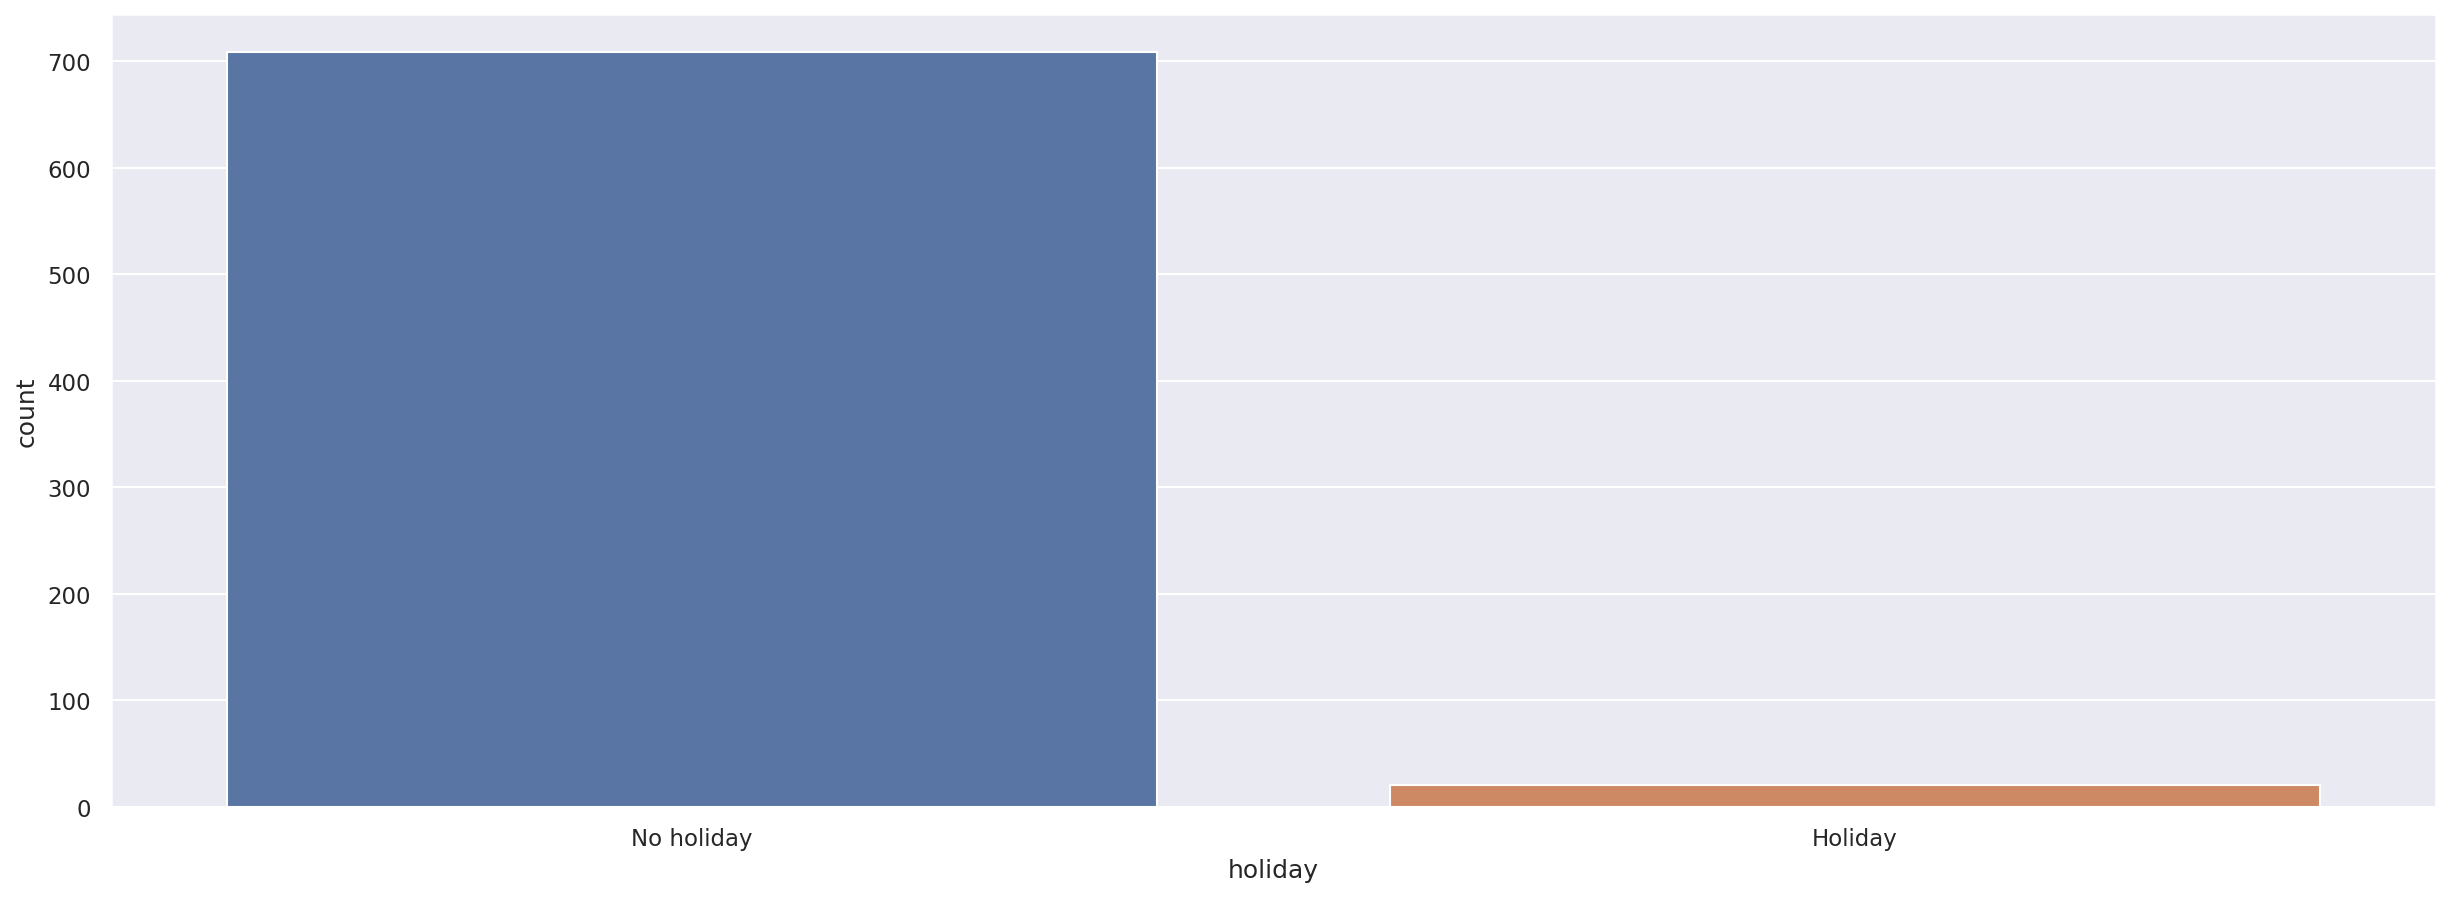

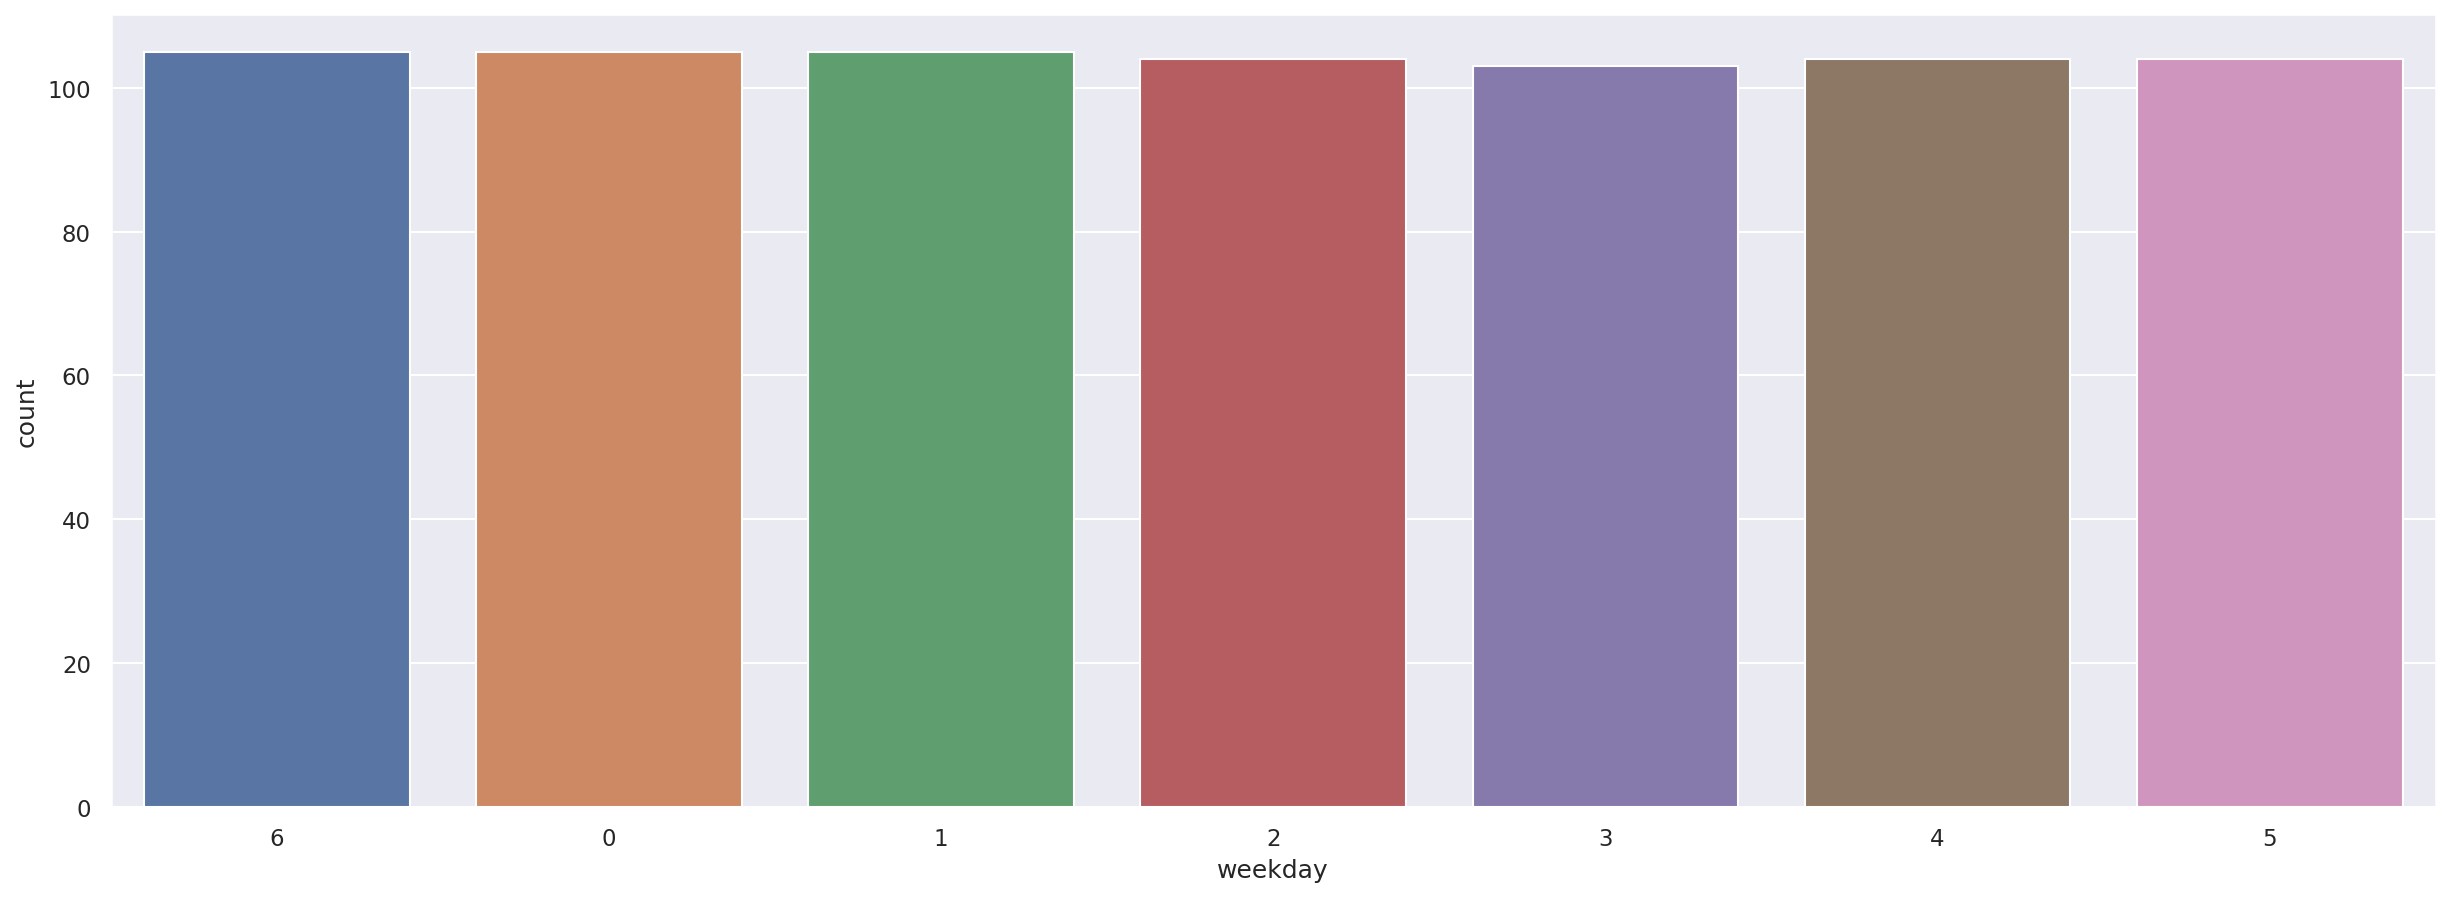

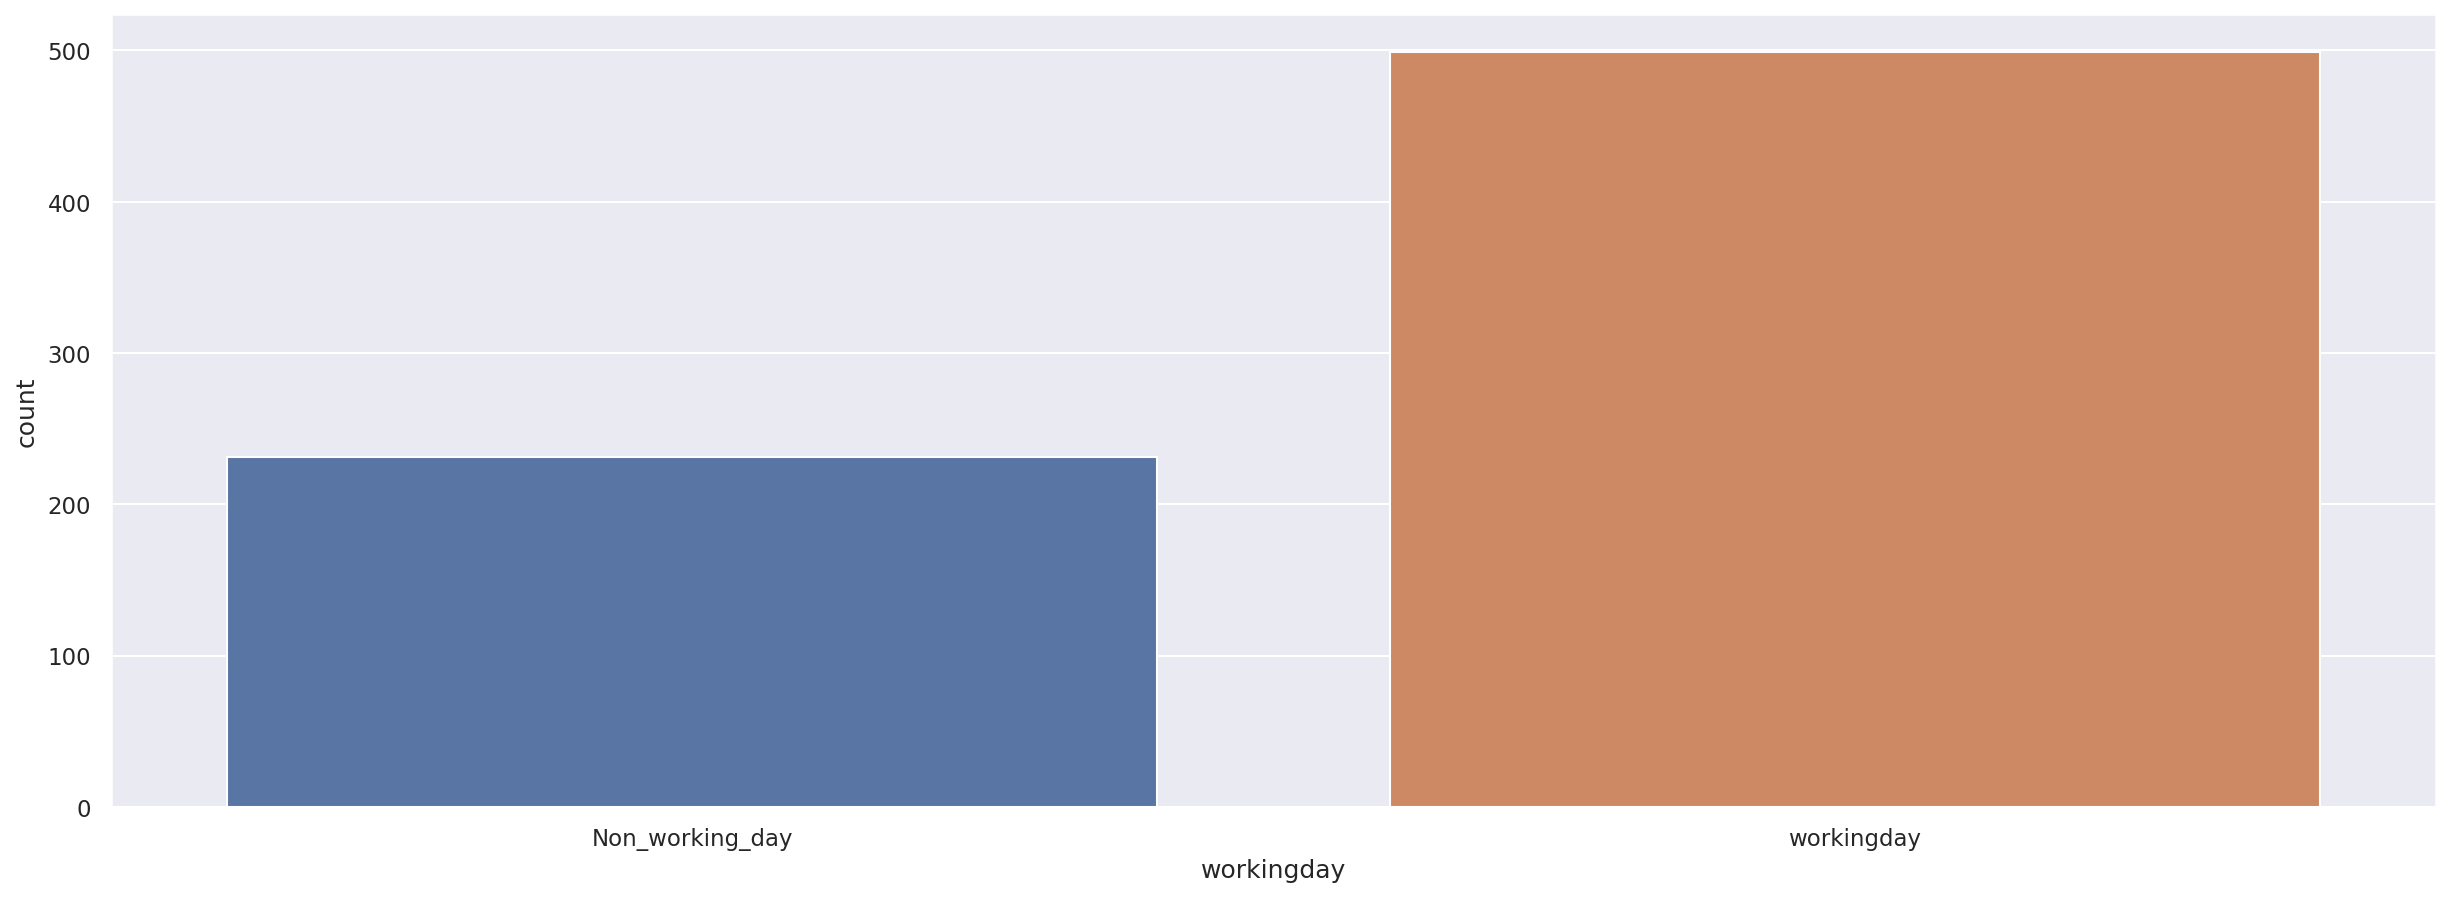

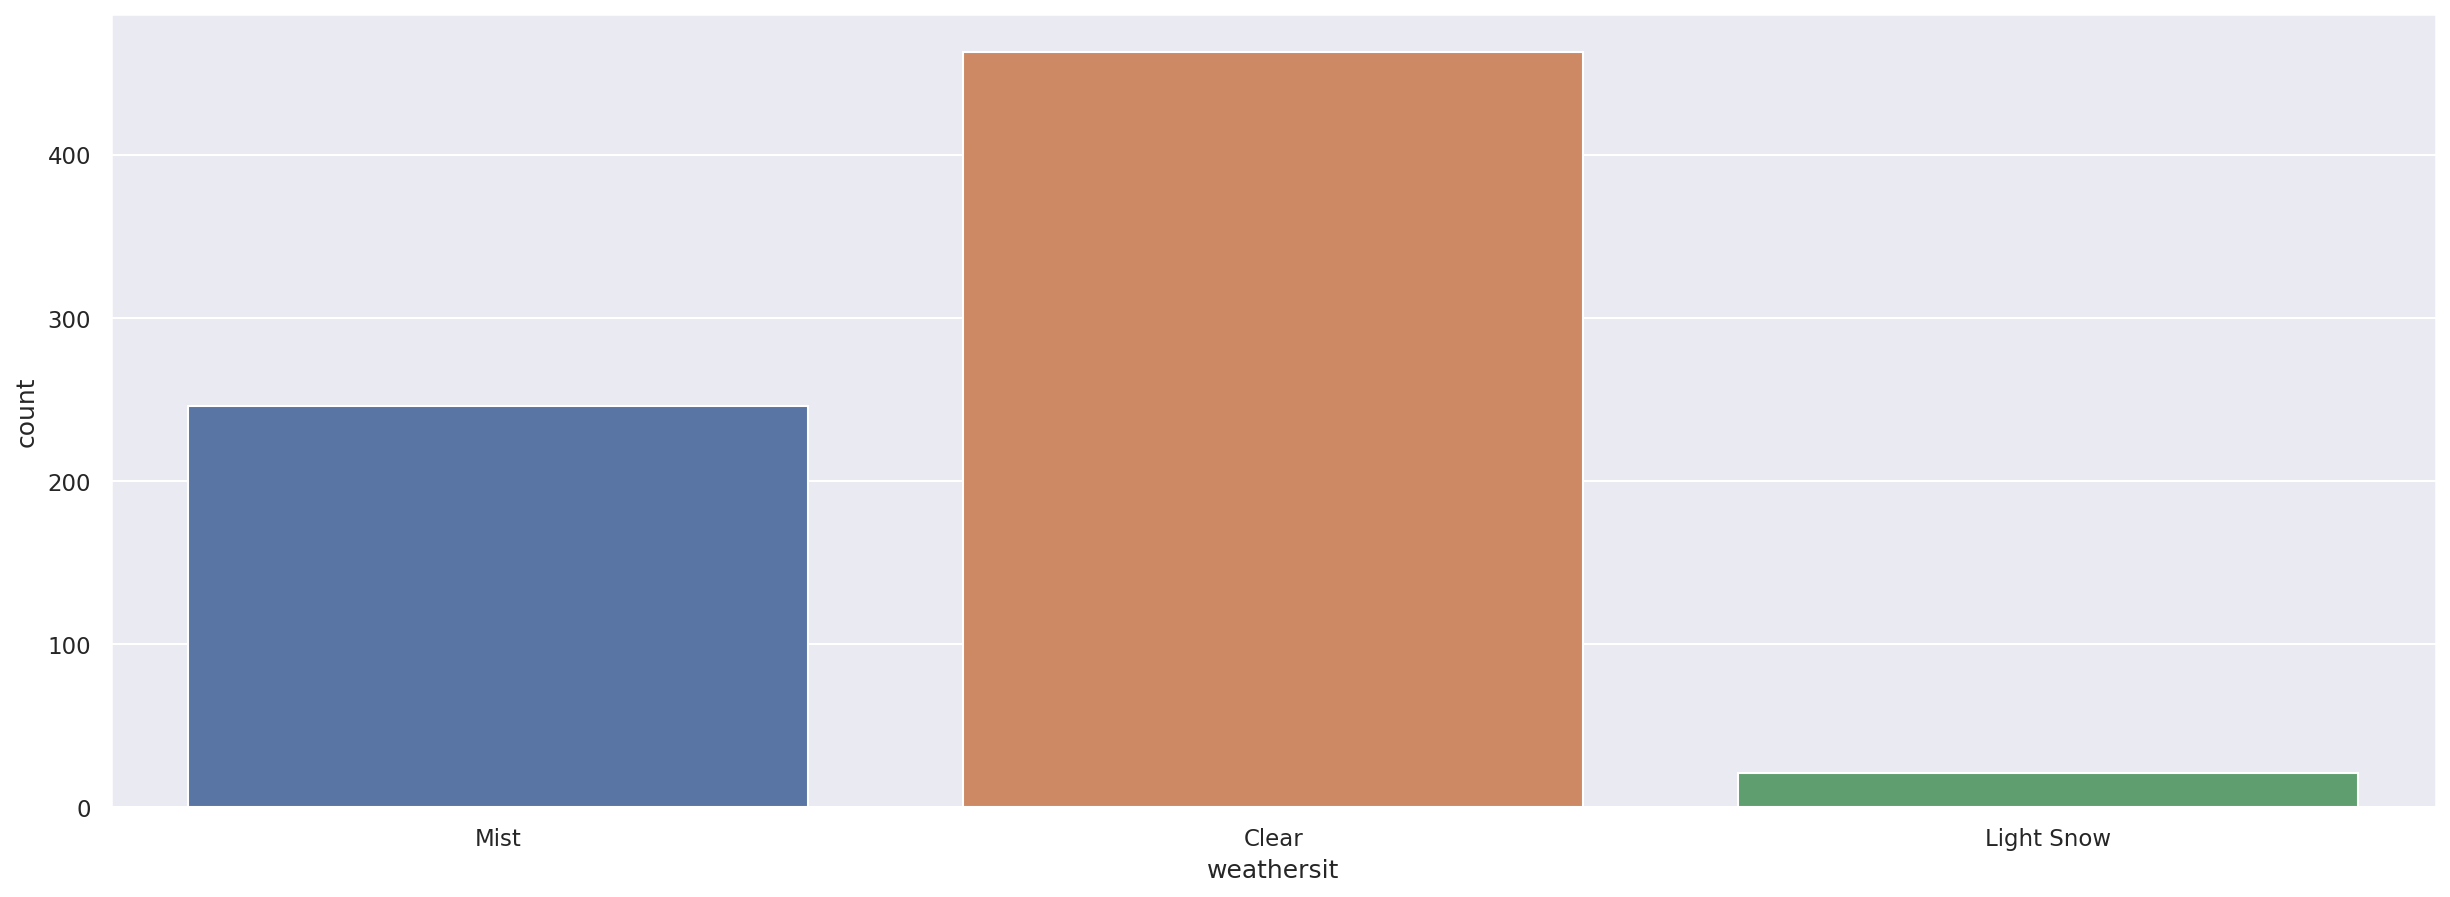

In [499]:
countplot(cat_cols)

##### Observations on countplot:

    1. In given data all 'seasons','years','months' & 'weekdays' looks evenly occurered.
    2. Except 'working day' and 'Non holiday' occured significantly more than 'non working day' and 'holiday'
    3. In Weathersit column occurence of data of 'Clear weathersit' is more and 'Light snow' very less, point to note here 
       is there is no occurence of 'Heavy Rain' even for single time.
    
    

--------------
Bar plot

In [500]:
def barplot(cat_cols):
    
    for col in cat_cols:
        plt.figure(figsize=(20,7),dpi=150)
        ax=sns.barplot(x=df[col],y=df['cnt'],estimator=np.mean,errwidth=0,hue=df['yr'])
        #ax.bar_label(ax.containers[0])
        for i in ax.containers:
            ax.bar_label(i,)

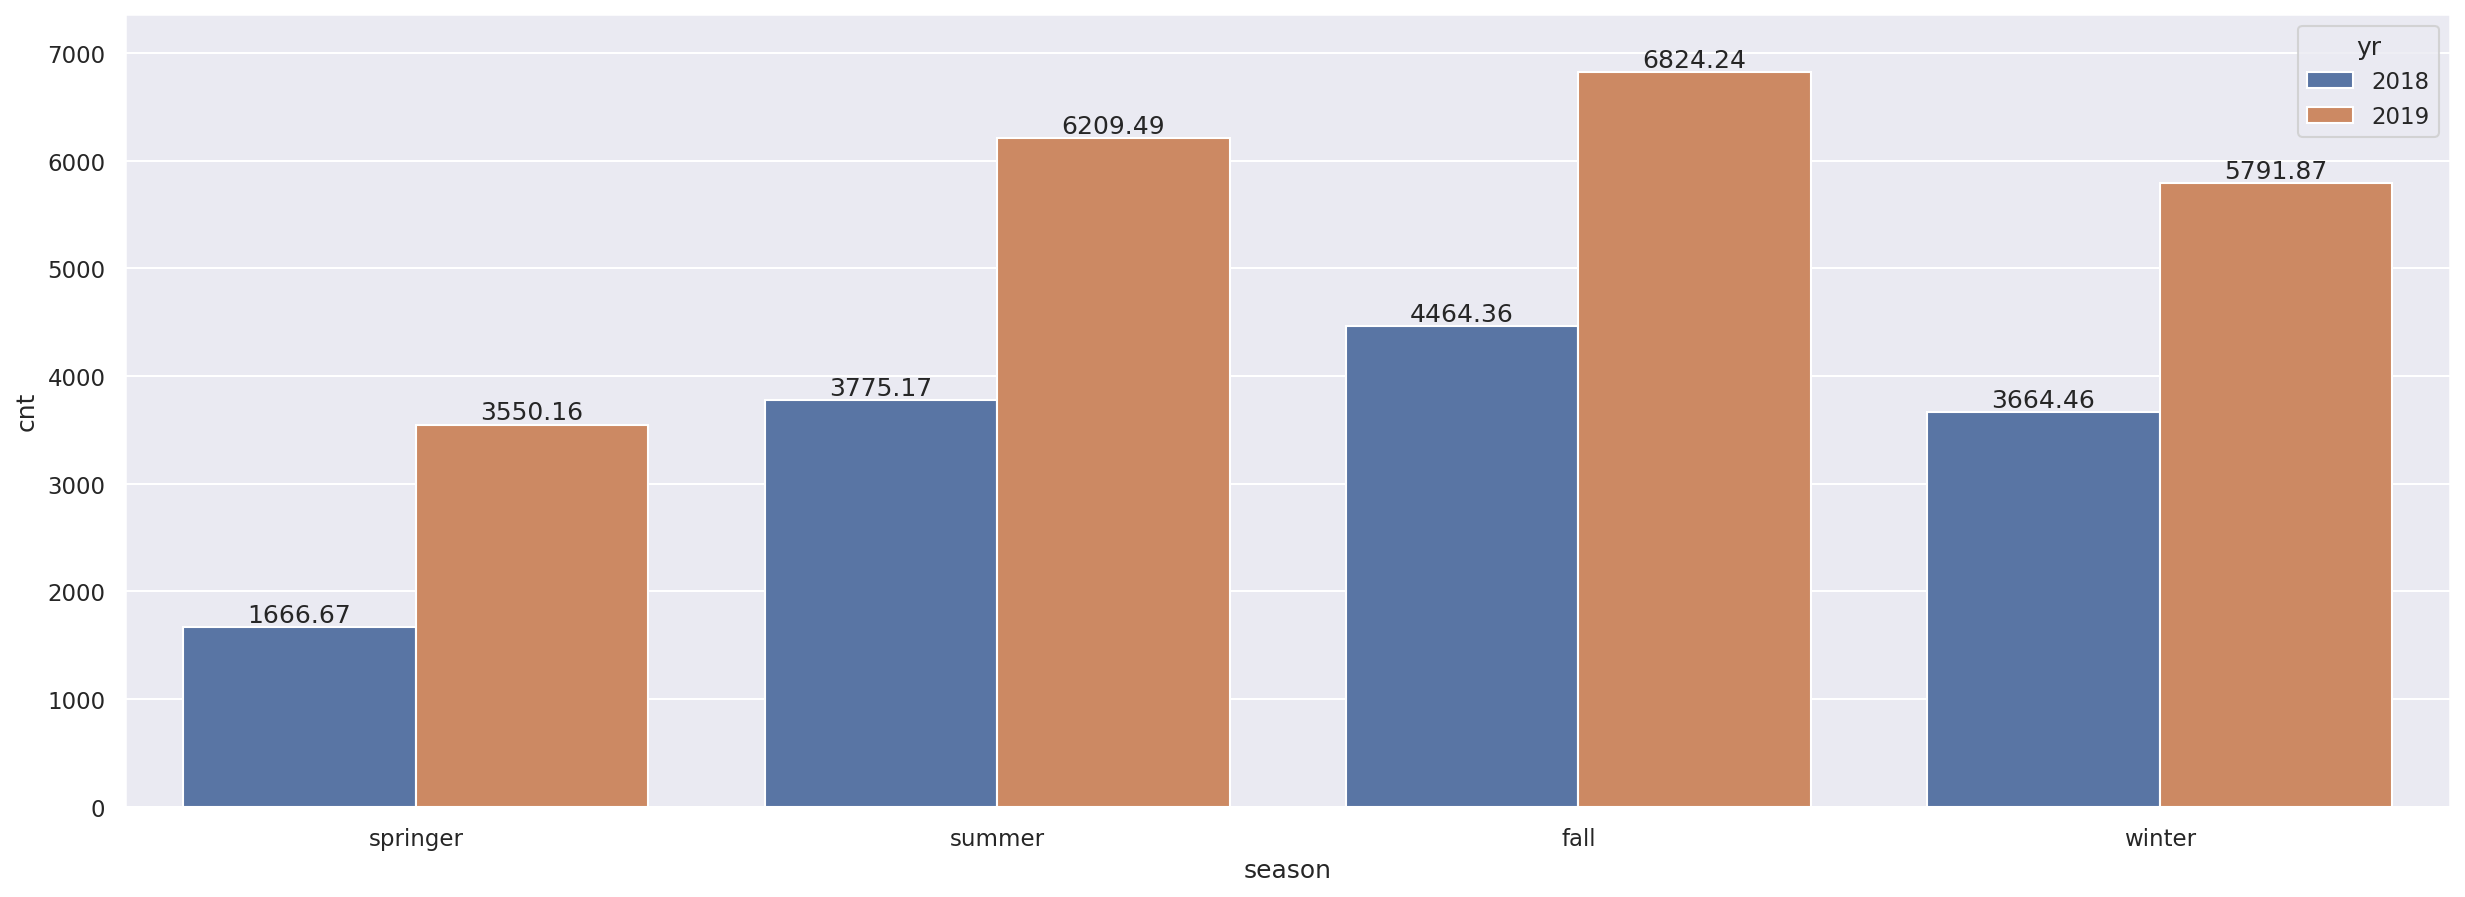

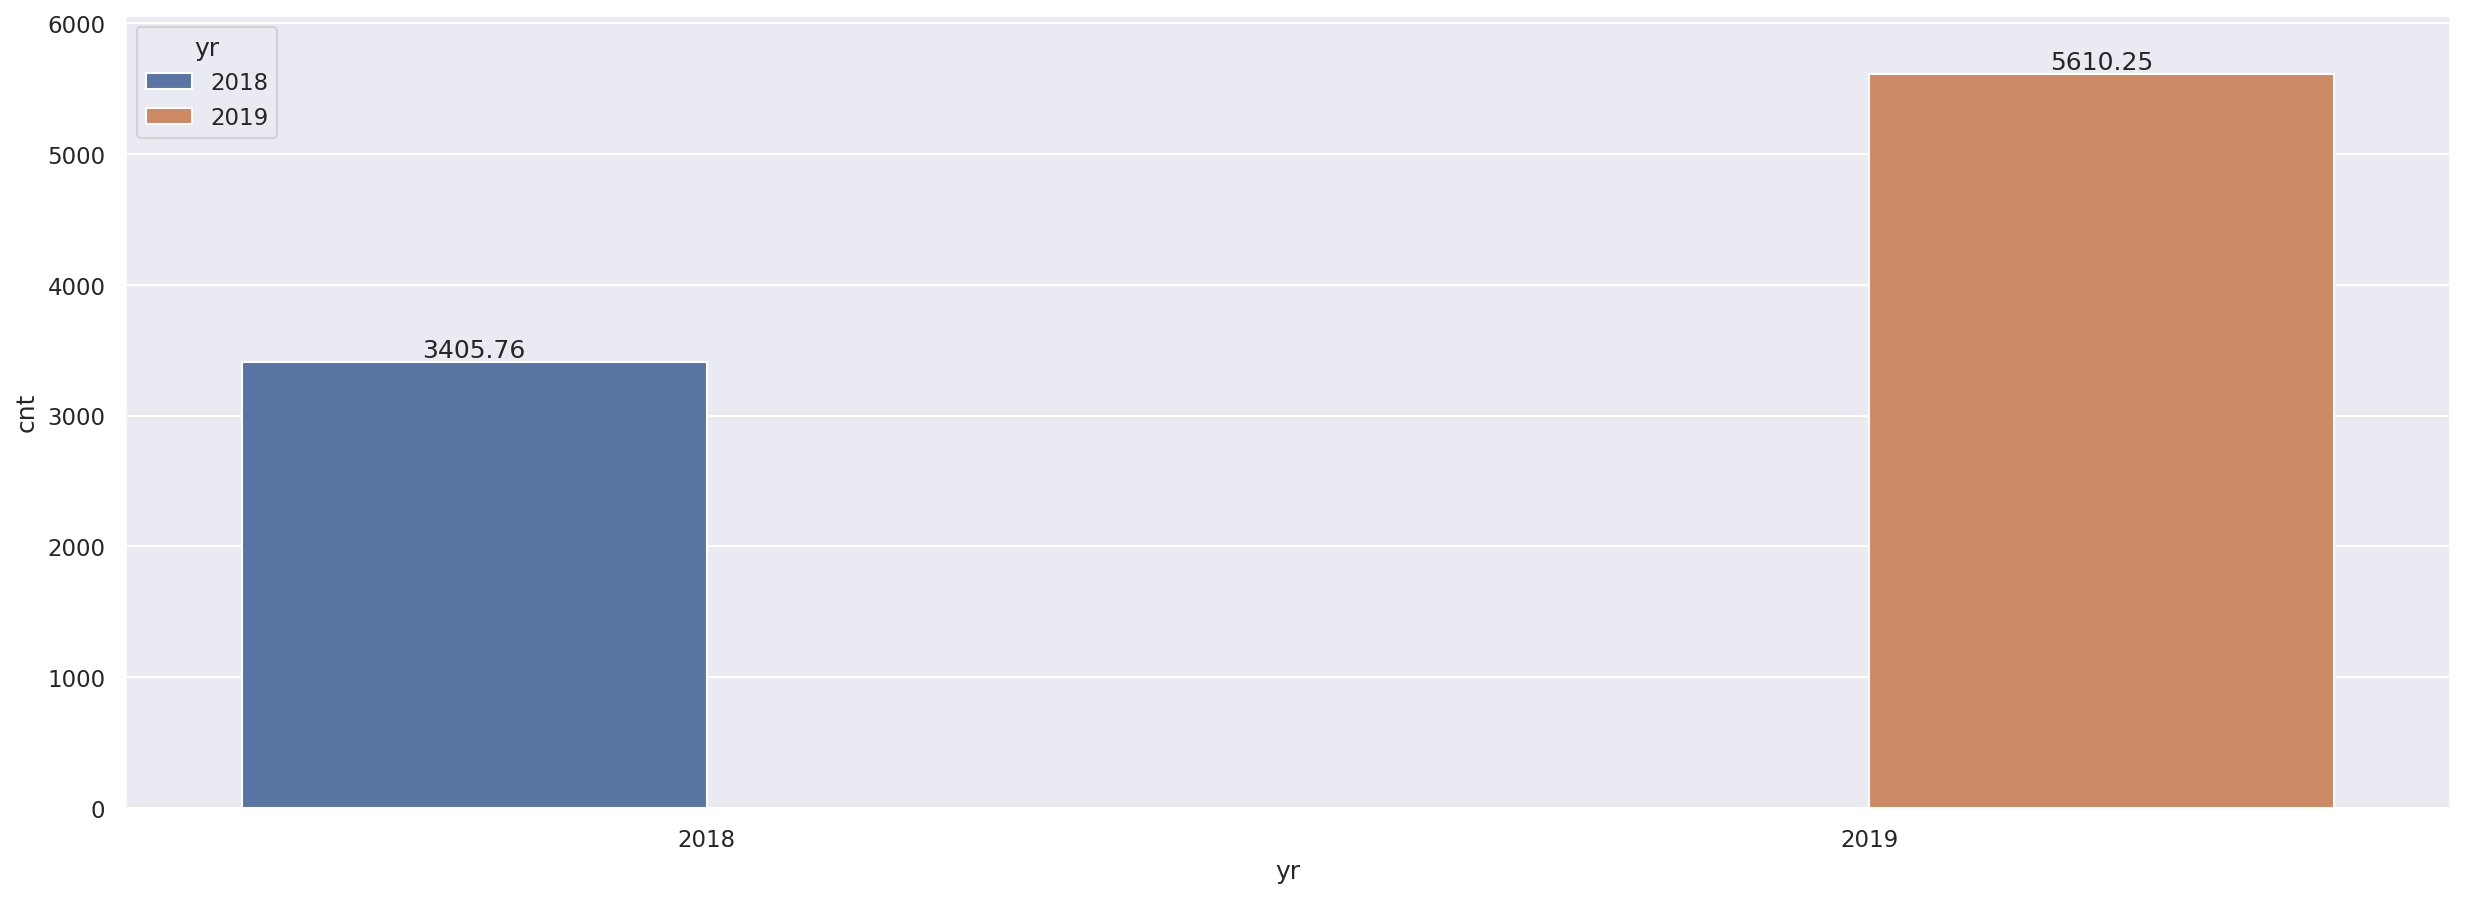

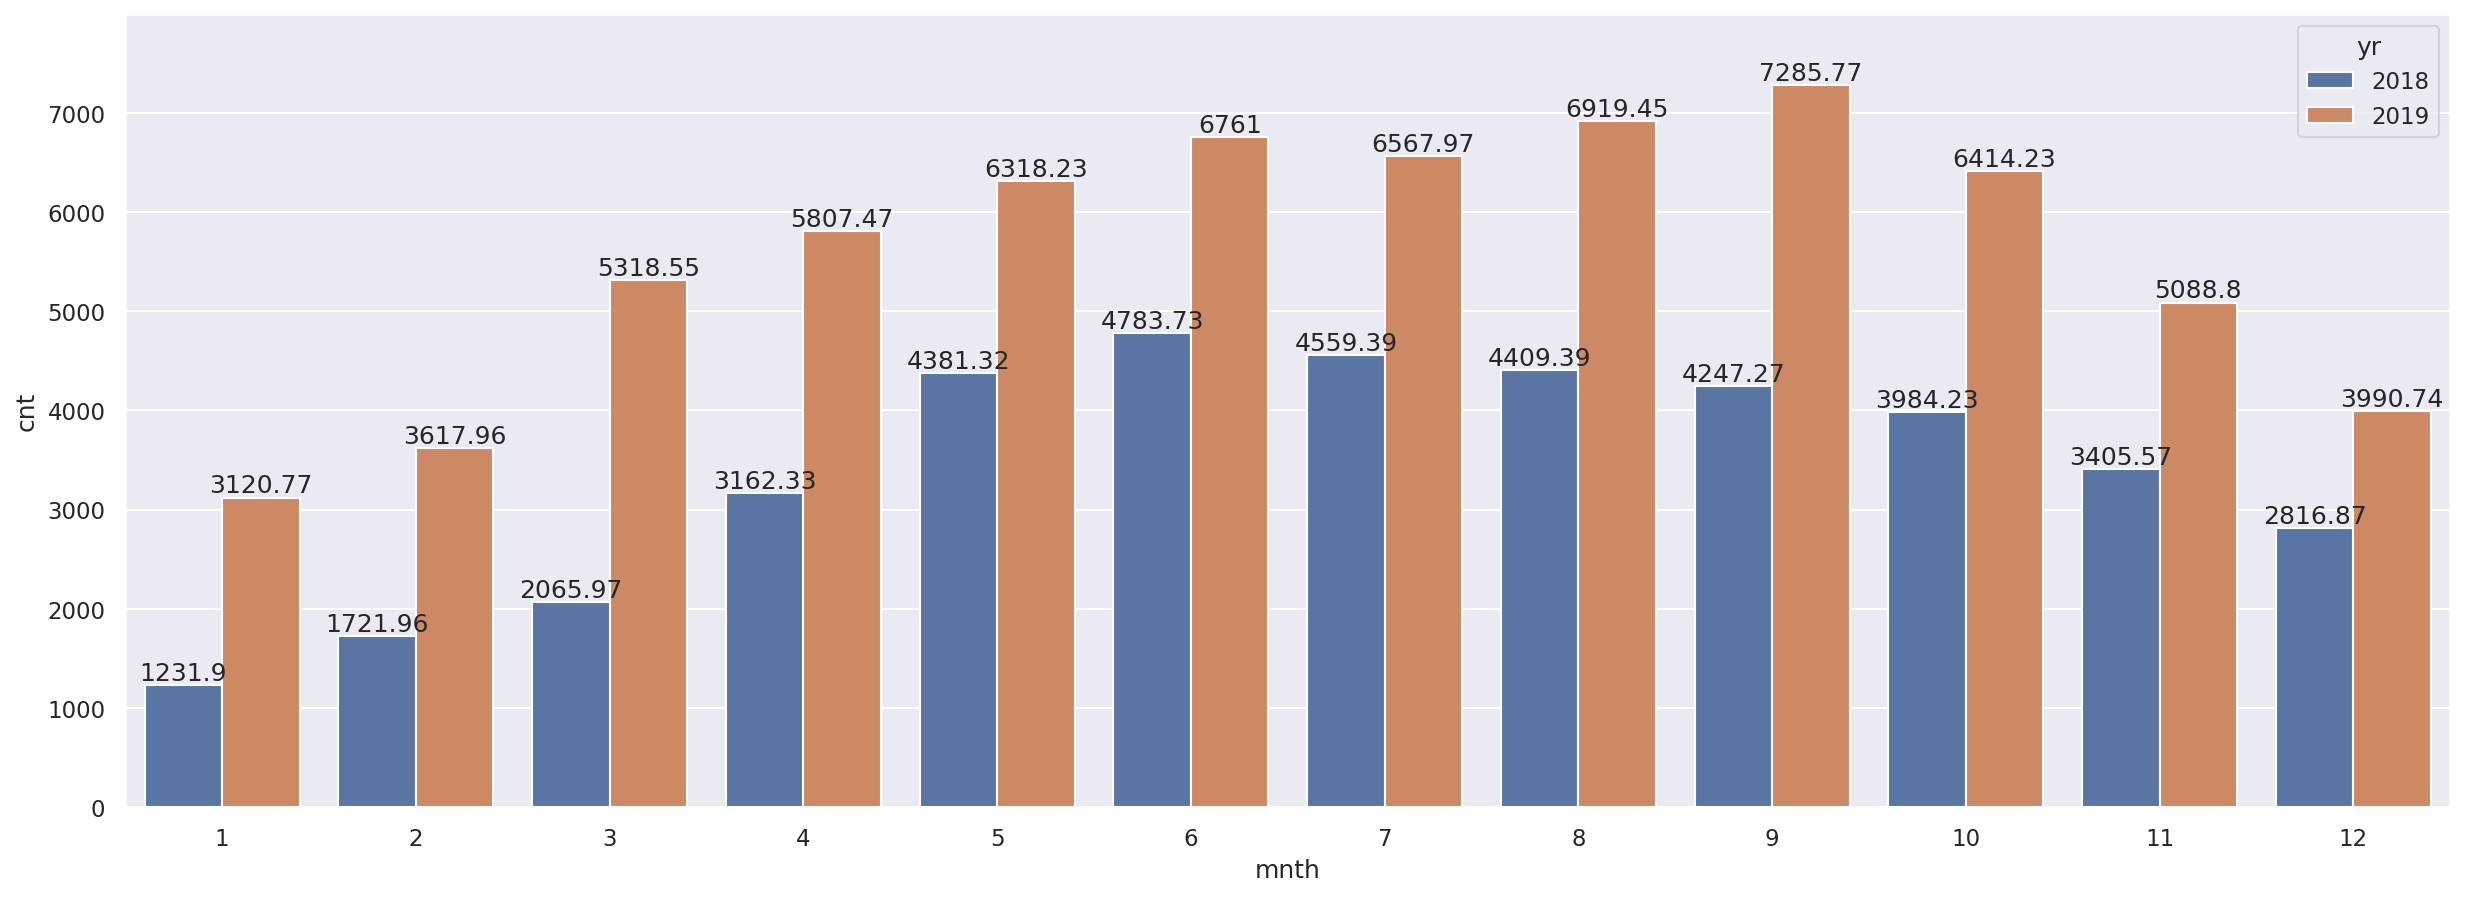

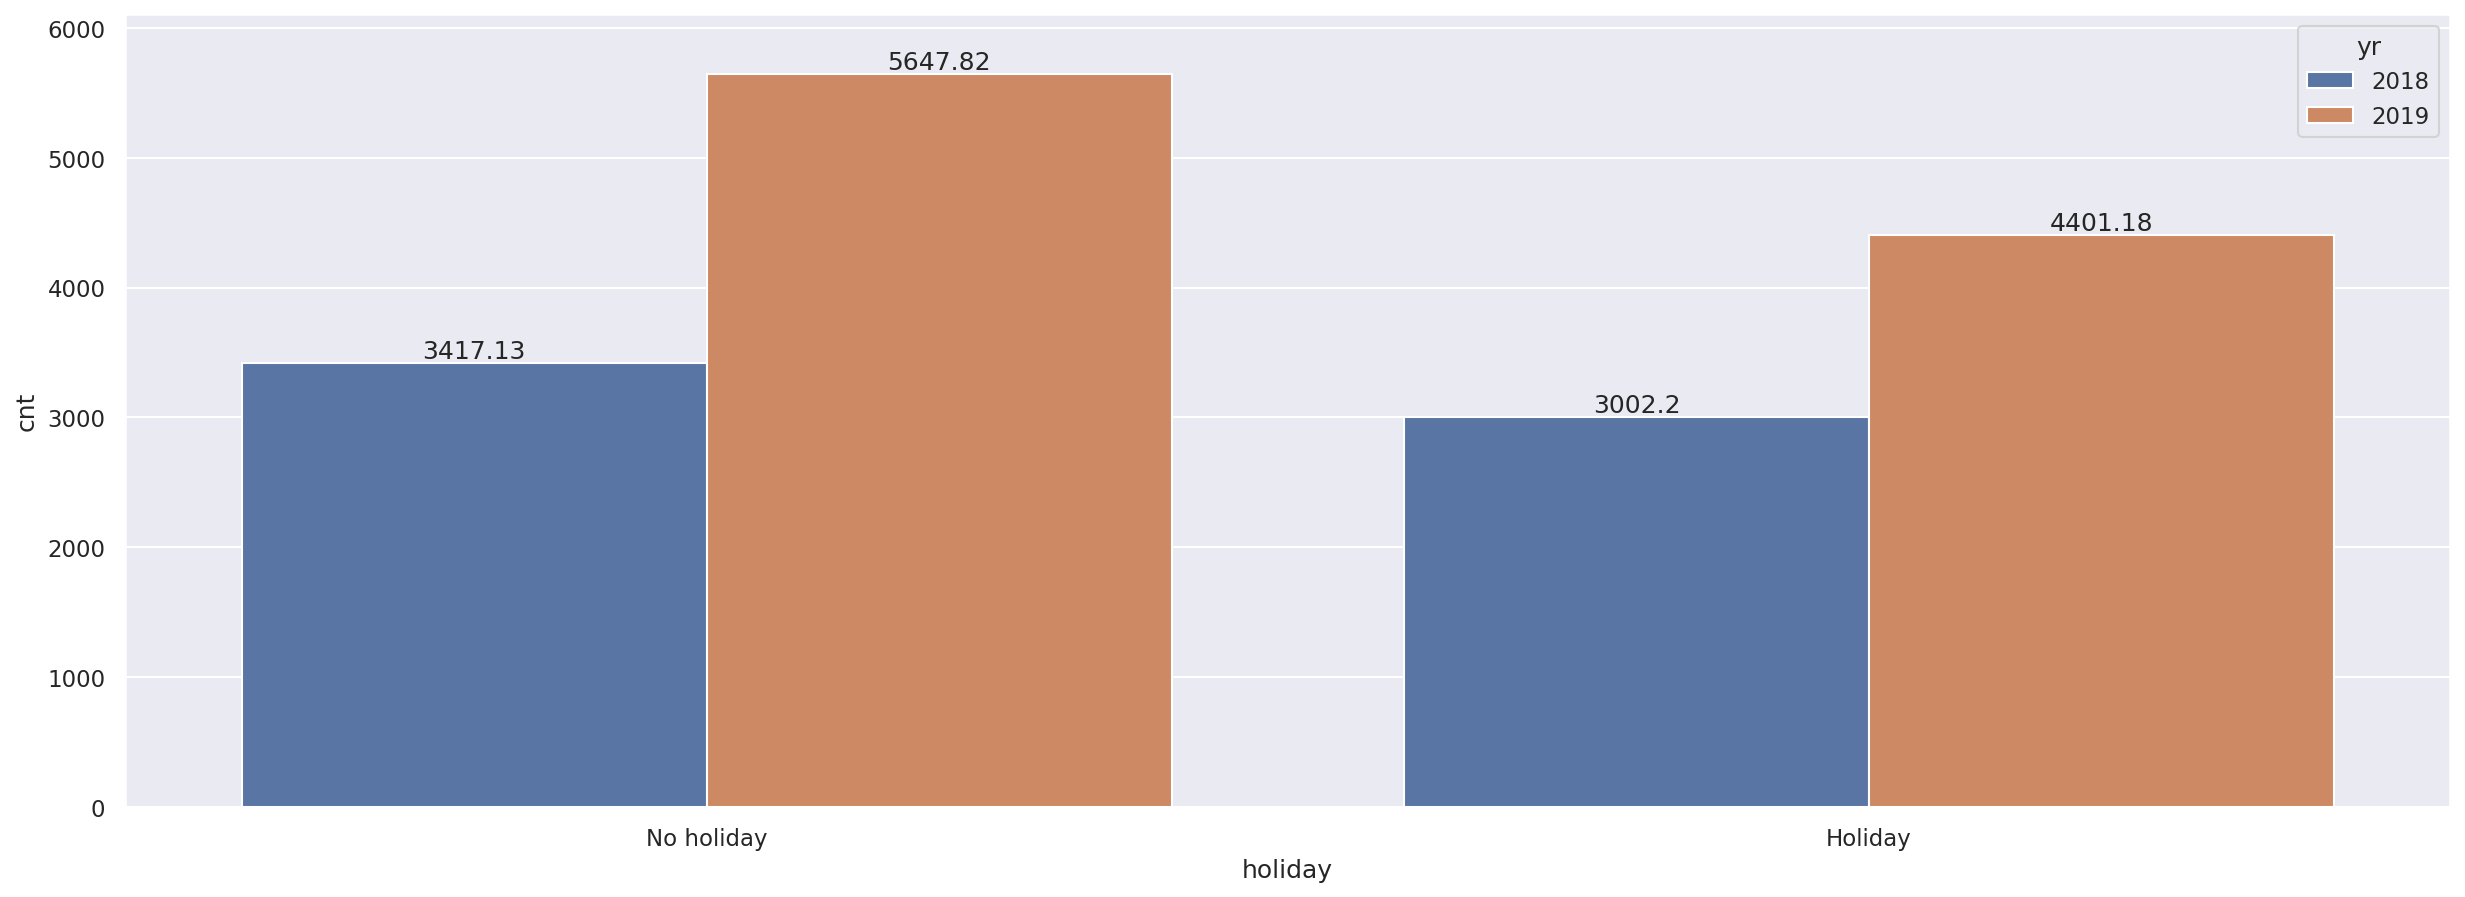

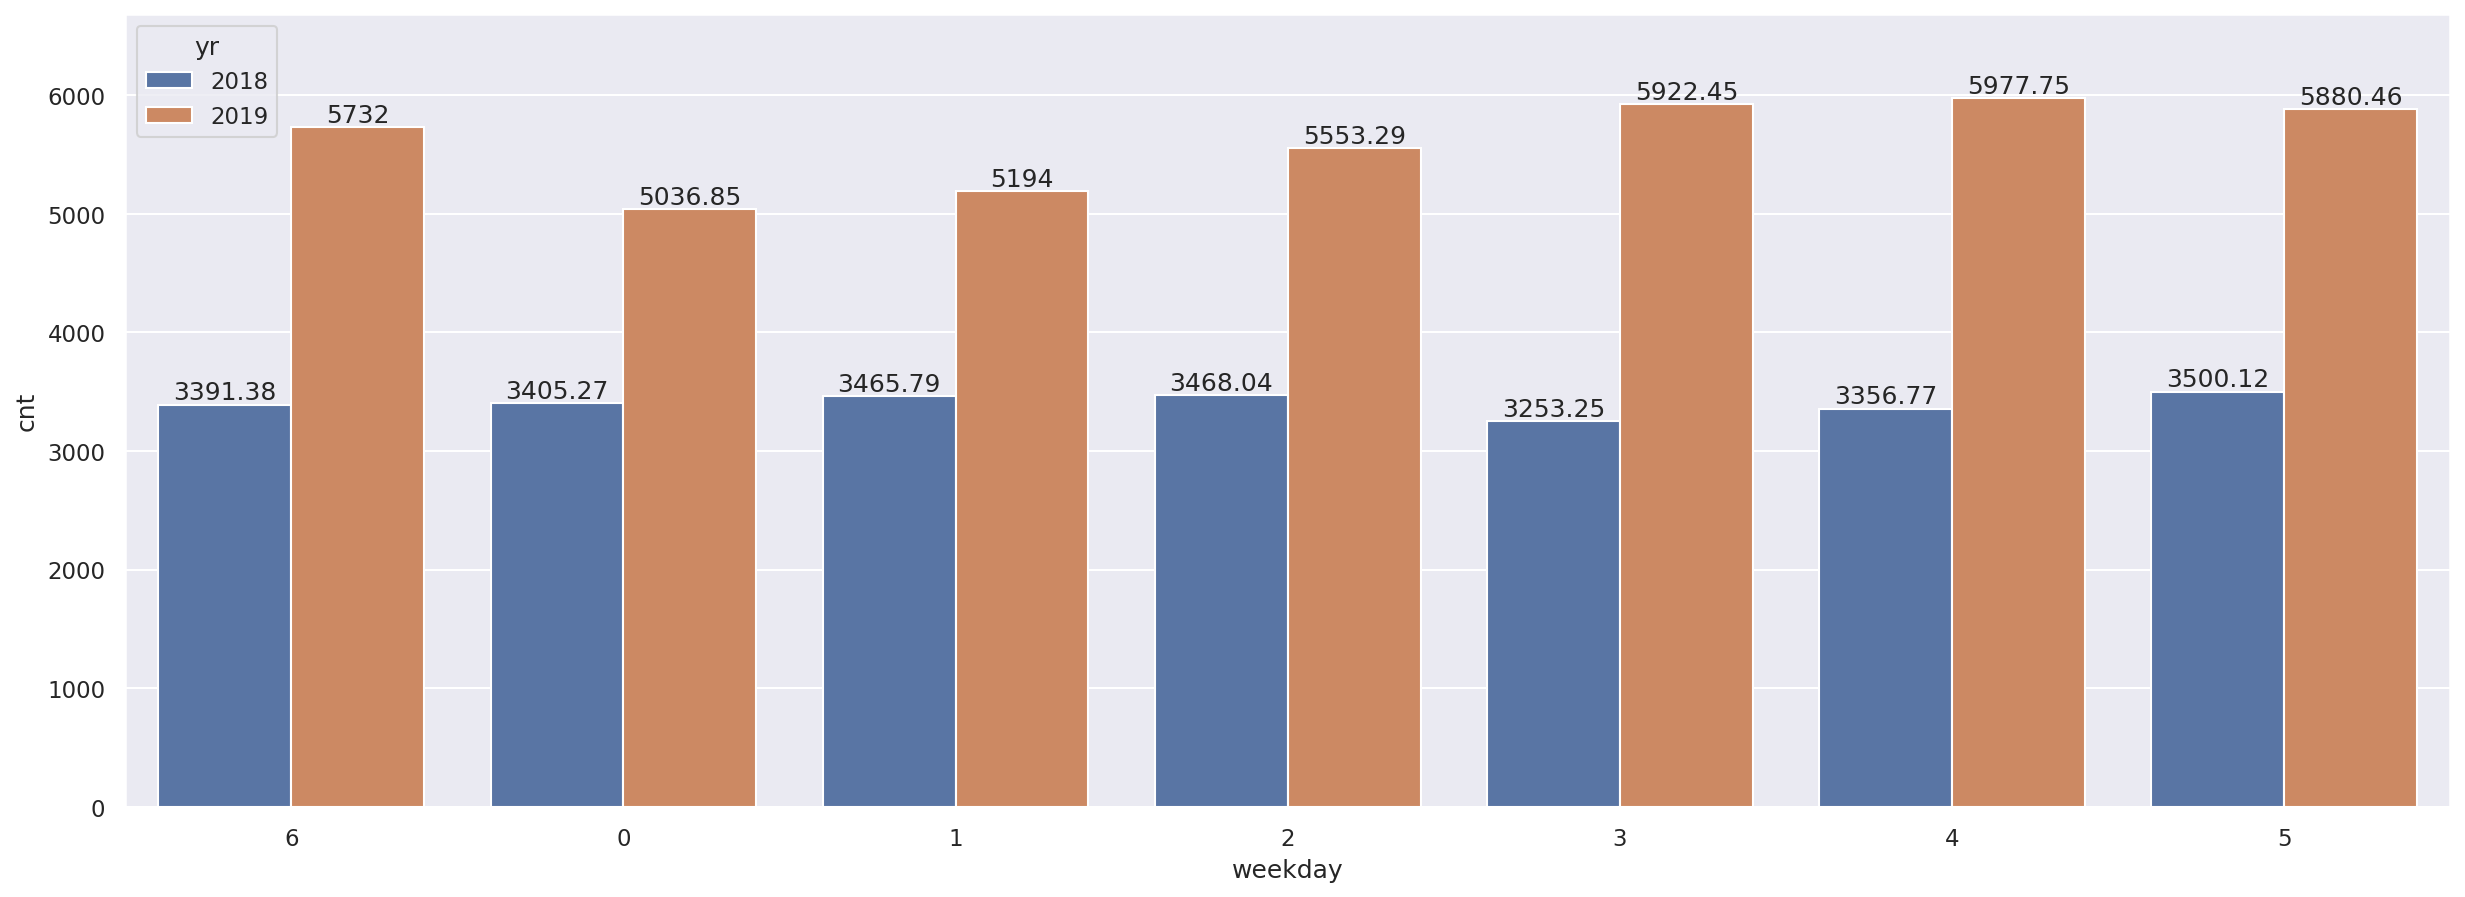

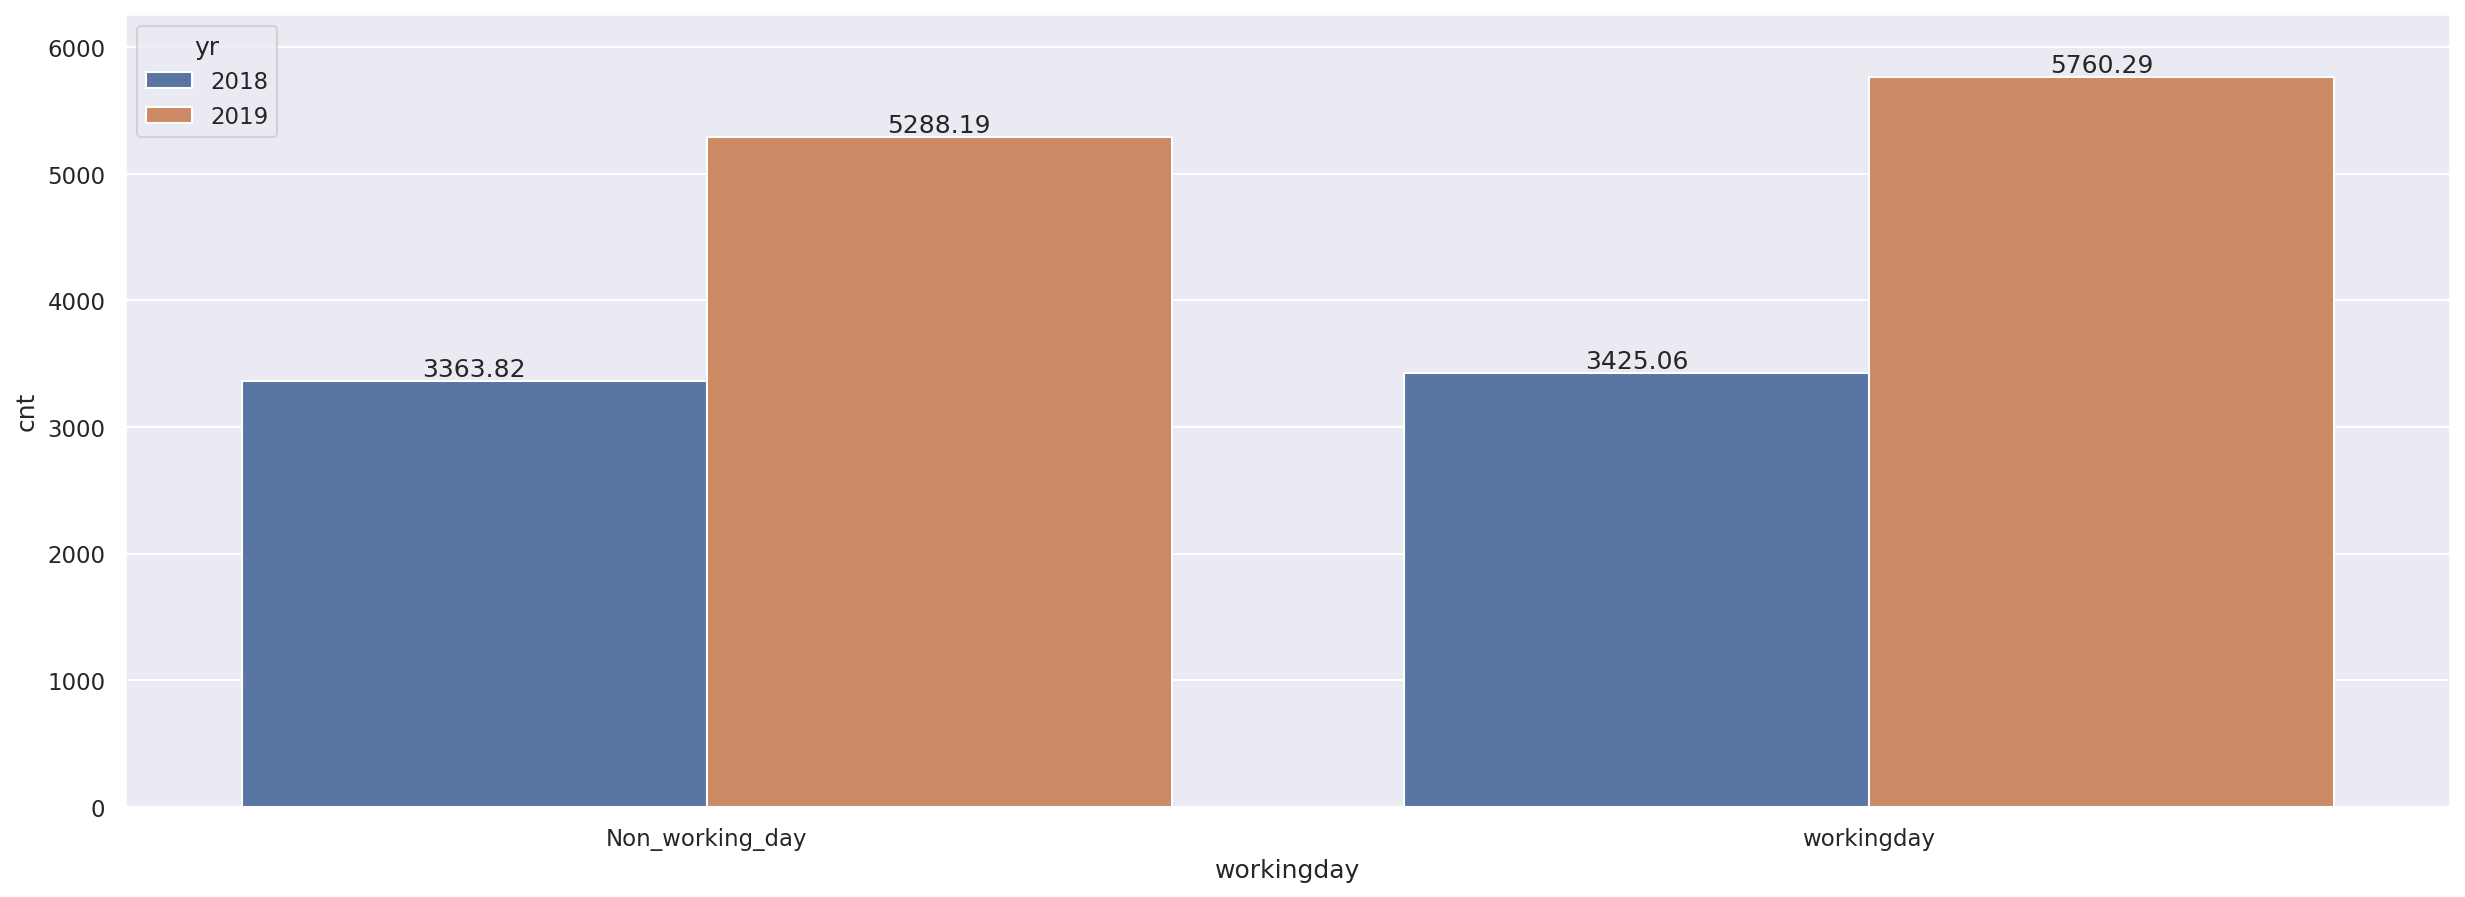

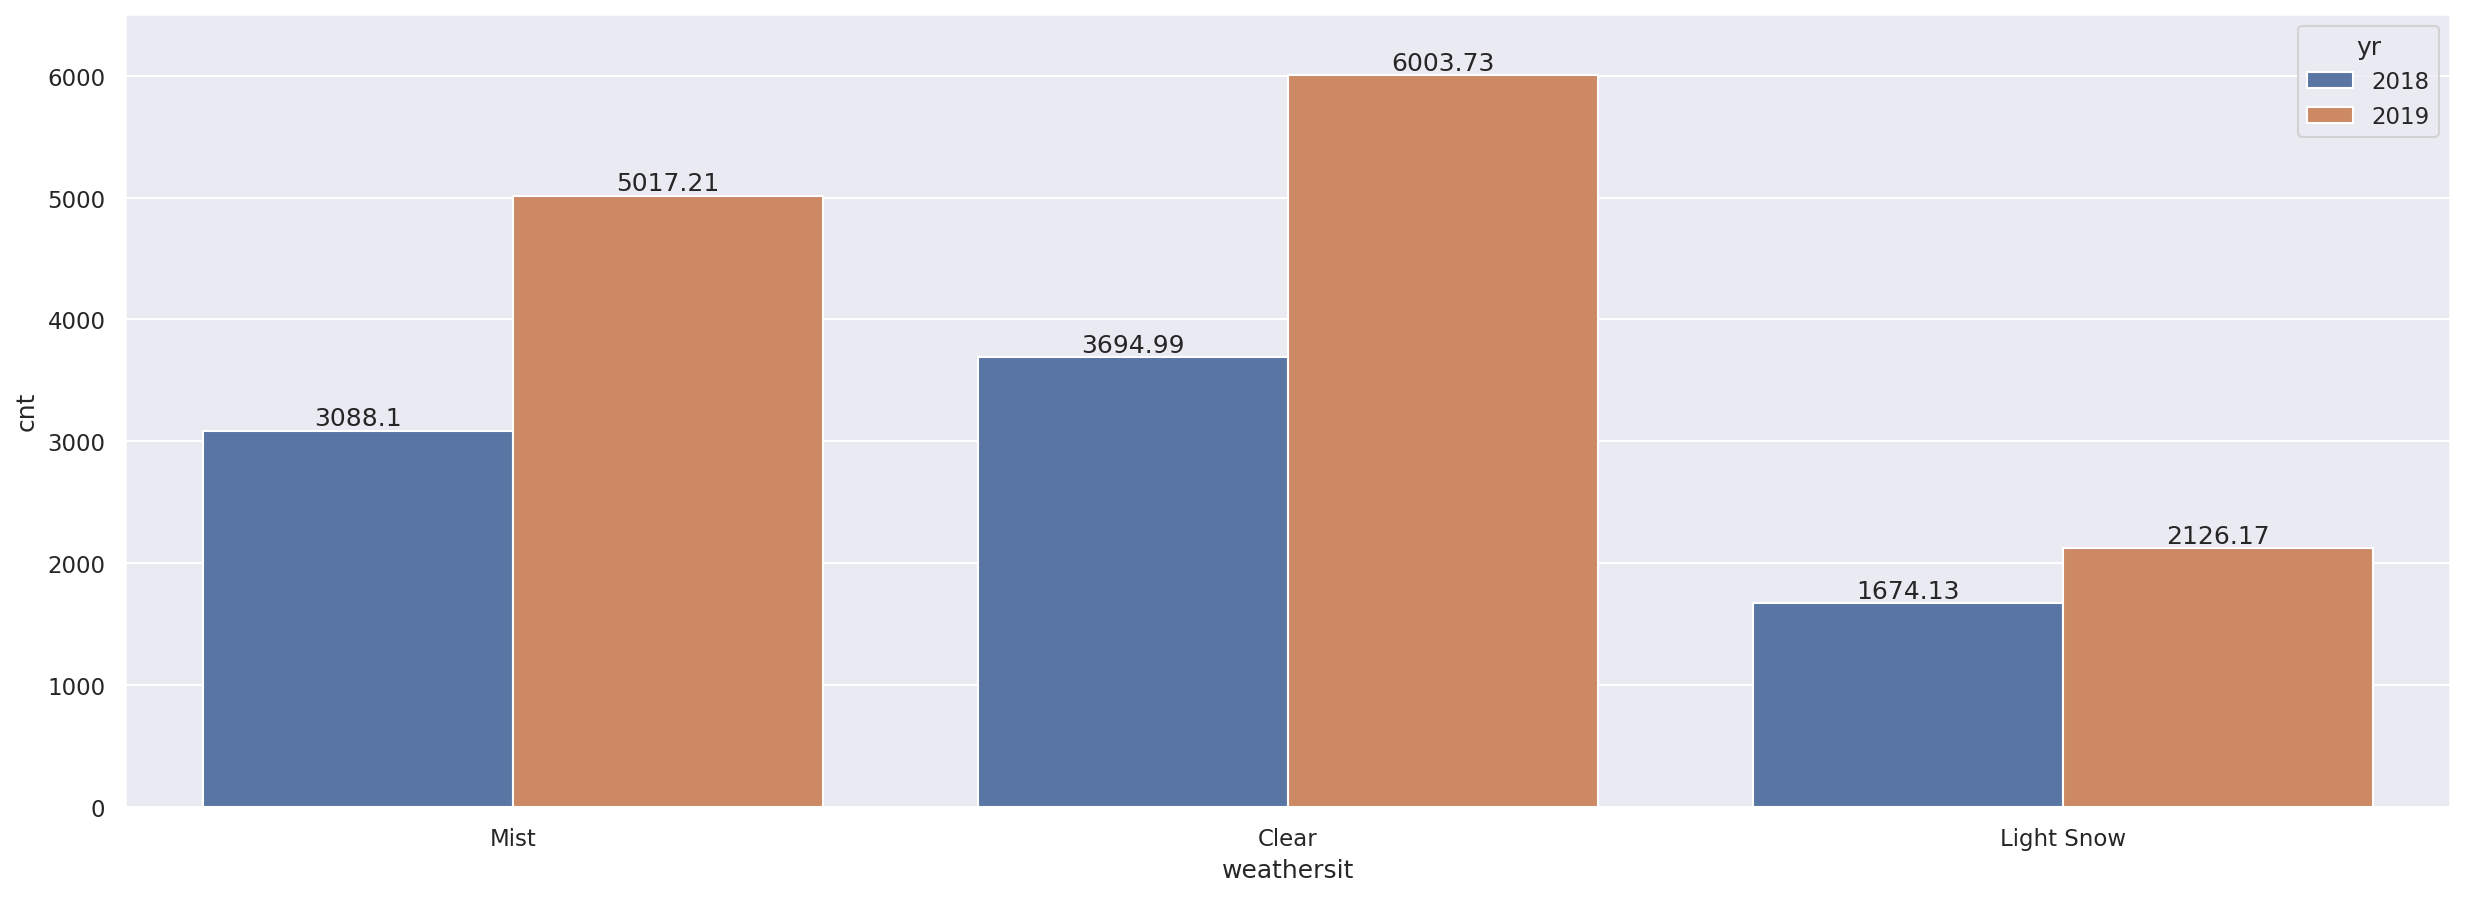

In [501]:
barplot(cat_cols)

In [502]:
#Average rentals

df['cnt'].mean()

4508.006849315068

In [503]:
#Average rentals in 2018

df[df['yr']=='2018']['cnt'].mean()

3405.7616438356163

In [504]:
#Average rentals in 2019

df[df['yr']=='2019']['cnt'].mean()

5610.2520547945205

##### Observation on barplot:

    1. Average rentals are approx 4500 
    2. Rentals in 'Springer' season is lesser than average rentals
    3. 2018 has not mantained average rentals. (is less than almost 1000 nos.)
    4. from 'January' to 'April' and from 'November' to 'December' there is less rentals than average for both year 2018 
       and 2019
    5. from 'May' to 'October' numbers have maintained average rental value.
    6. There is no significant effect of day of week on rental numbers
    7. on holidays there is slight reduction in average rentals
    8. there is slight reduction in average rentals in 'Mist' weather and significant reduction in average rentals in 
       'Light snow', There is no rentls in 'Heavy Rains'
    

--------------
Box Plot

In [505]:
def boxplot(cat_cols):
    
    for col in cat_cols:
        plt.figure(figsize=(20,7),dpi=150)
        sns.boxplot(x=df[col],y=df['cnt'])


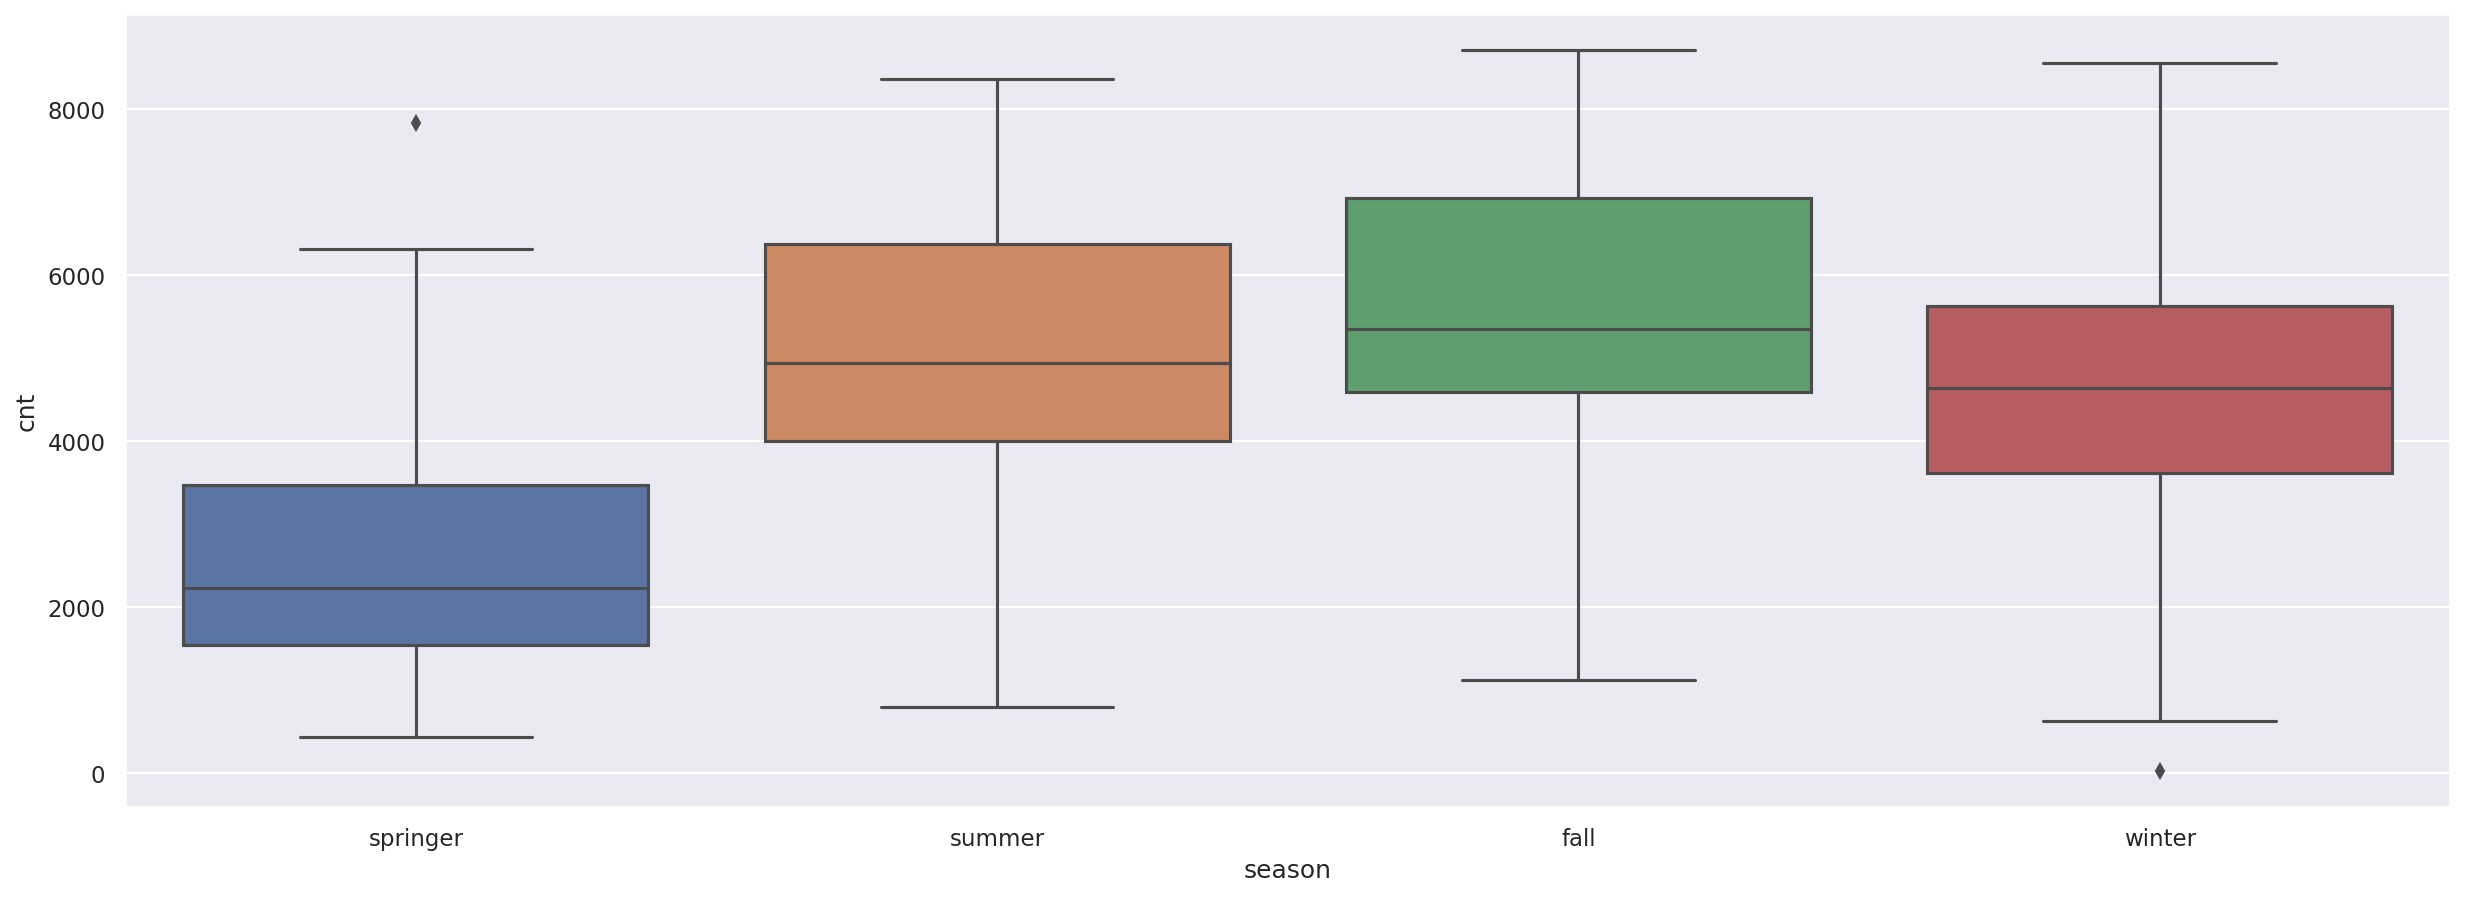

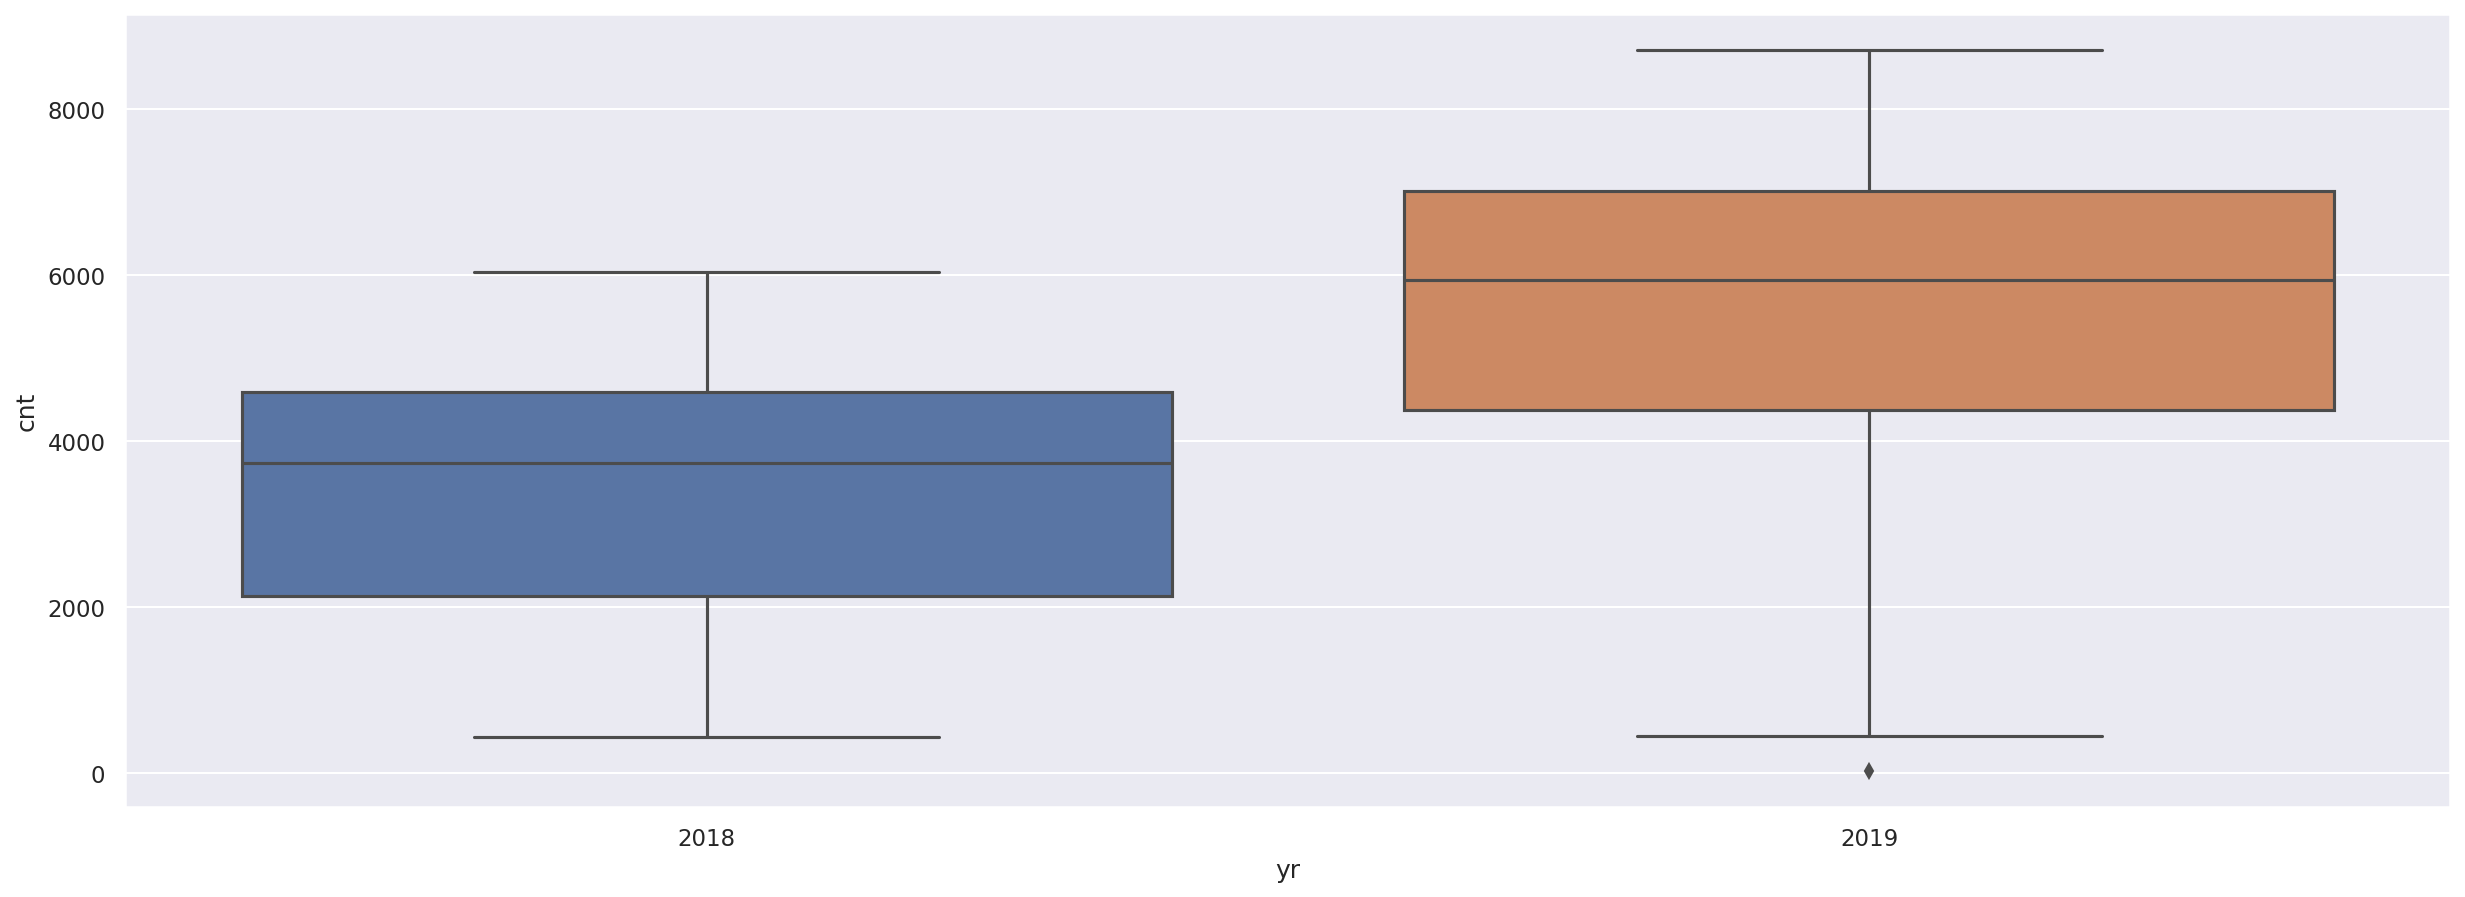

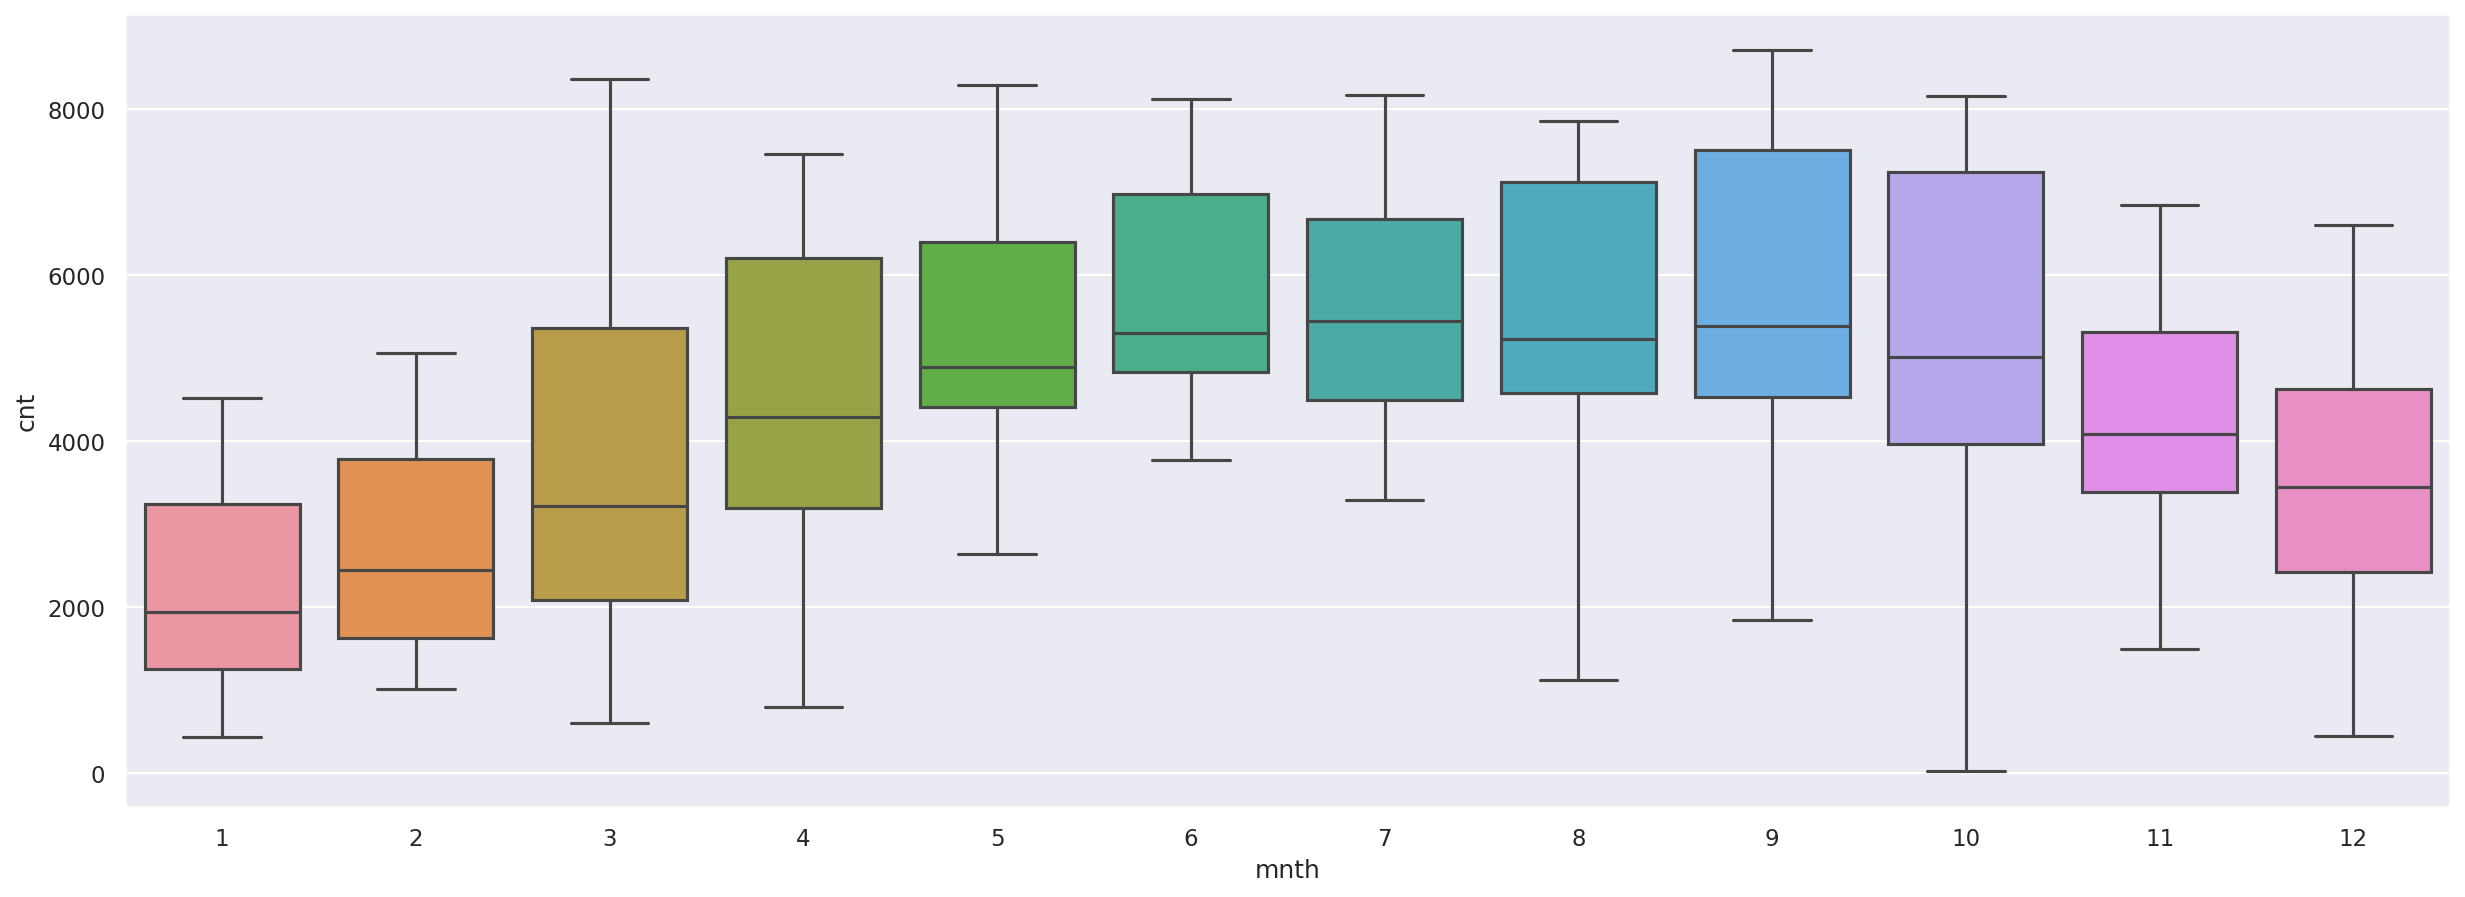

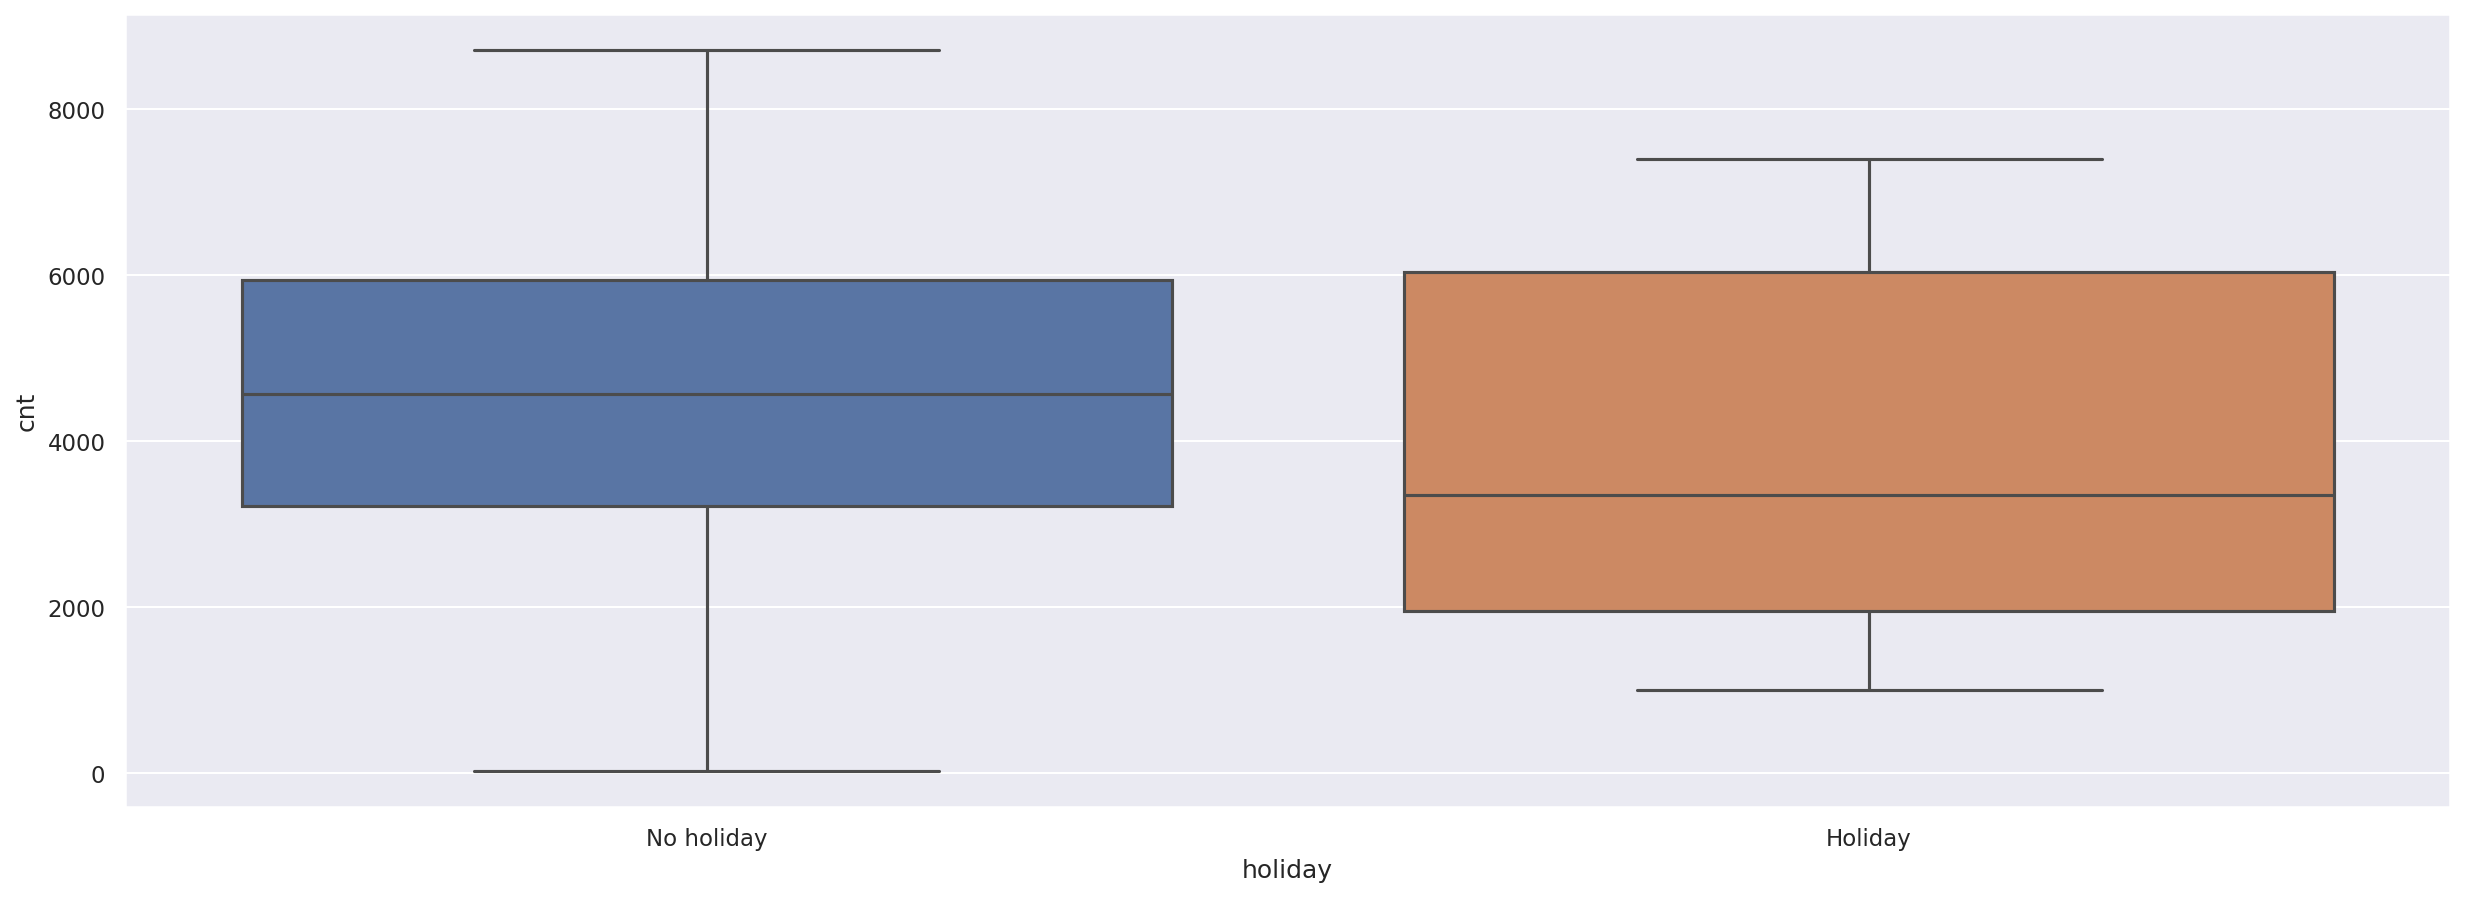

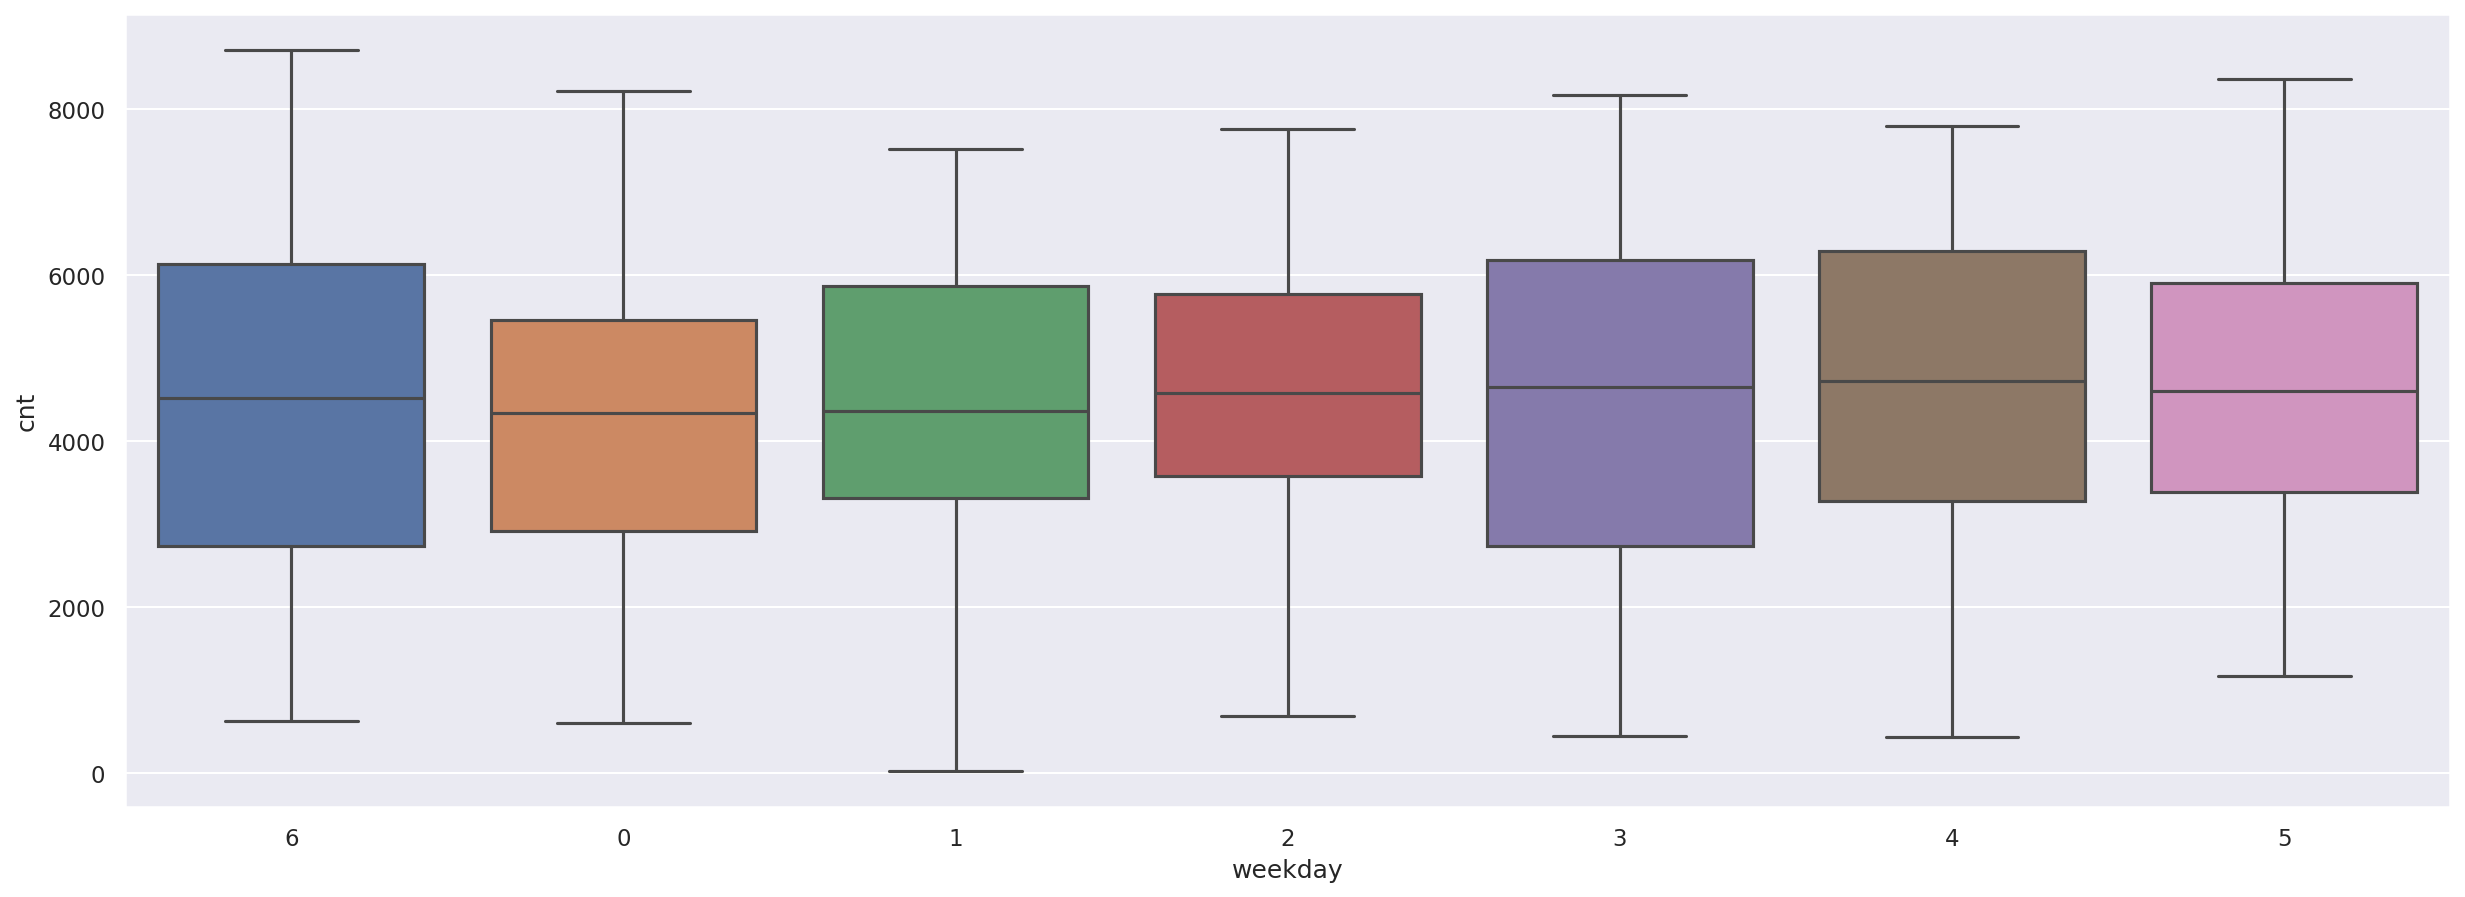

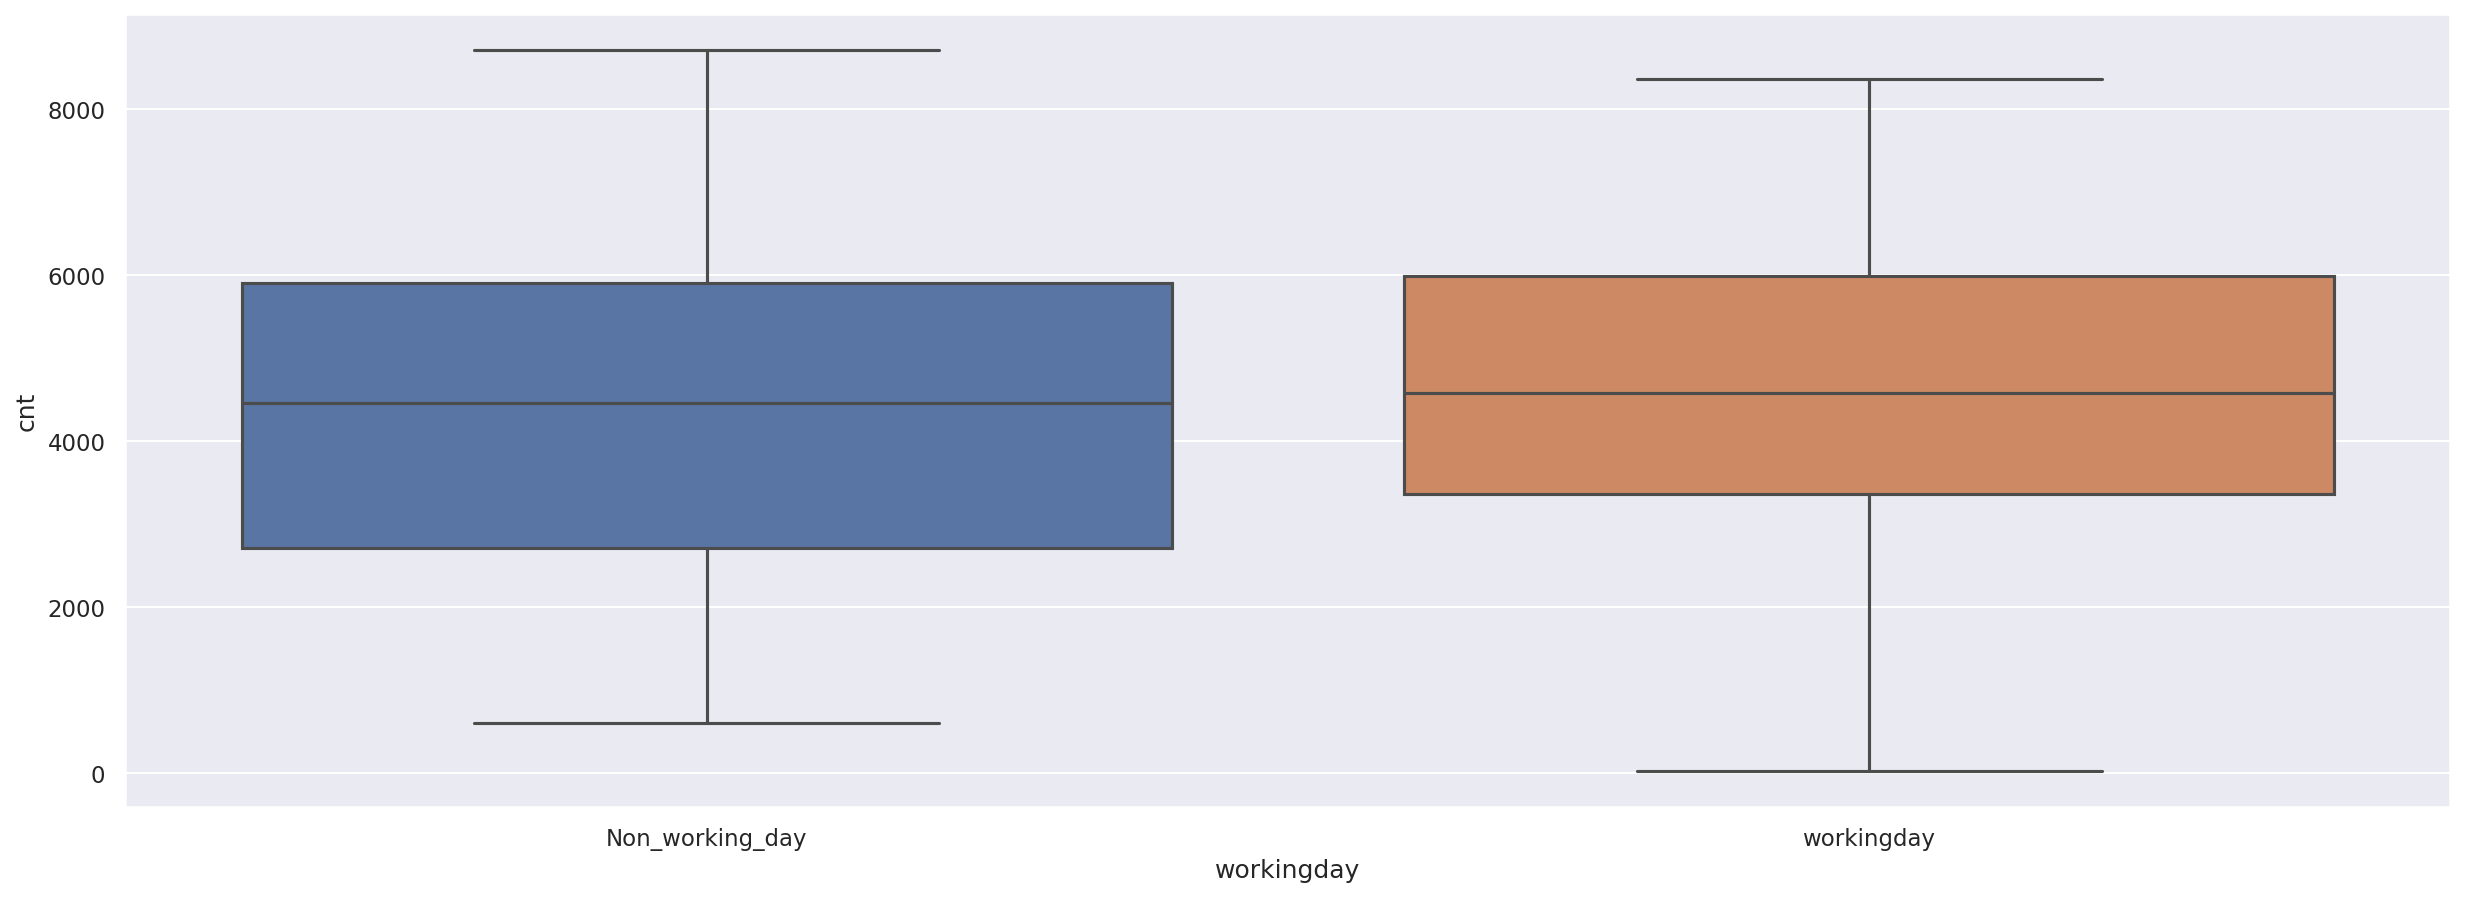

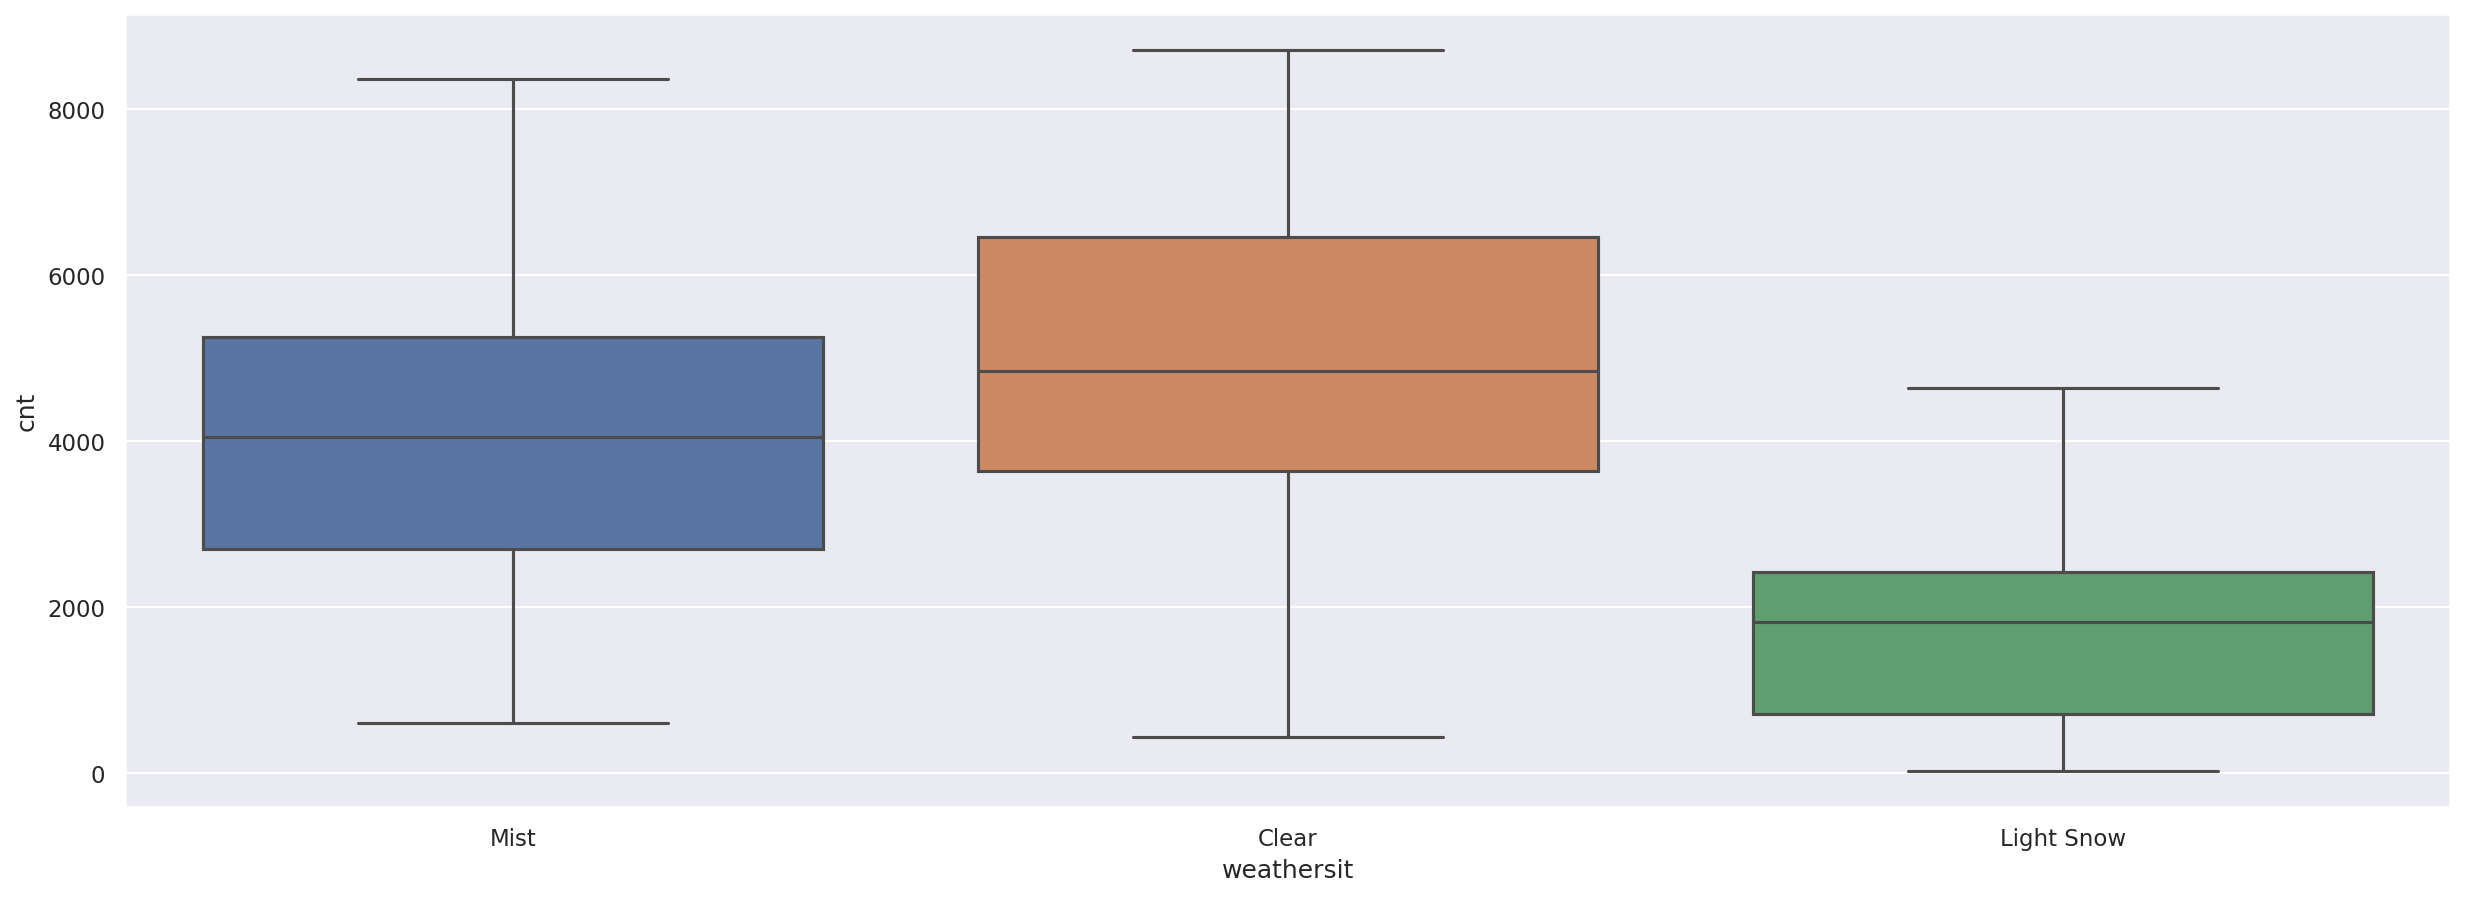

In [506]:
boxplot(cat_cols)

##### Observation on boxplot:

In [507]:

#Categorical Outliers

In [508]:
def categorical_outliers(df):
    print("          --- OUTLIERS DETAILS for CATEGORICAL COLUMNS ---             ")
    
    targetcol=input("Enter target column name: ")
    cols=df.columns
    for i in range(len(cols)):
        
        col=cols[i]
        
        if col==targetcol:
            continue
        else:
            print("\n\n COLUMN: {} \n".format(col.upper()))
            cats=df[col].unique()
        
        for i in range(len(cats)):
            cat=cats[i]
            
            print("\n\n     --> Category: {} ".format(cat))
            
            
            
            q75,q25=np.percentile(df[df[col]==cat][targetcol],[75,25])
            iqr=np.round(q75-q25,3)
            upperlim=np.round(q75+(1.5*iqr),3)
            lowerlim=np.round(q25-(1.5*iqr),3)
            
            
            
            upper_indexes=df[(df[col]==cat) & (df[targetcol]>upperlim)].index
            lower_indexes=df[(df[col]==cat) & (df[targetcol]<lowerlim)].index
            
            mini=df[df[col]==cat][targetcol].min()
            maxi=df[df[col]==cat][targetcol].max()
            avg=np.round(df[df[col]==cat][targetcol].mean(),2)
            print("             Minimum {} is: {}".format(targetcol,mini))
            print("             Maximum {} is: {}".format(targetcol,maxi))
            print("             Average {} is: {}\n".format(targetcol,avg))
            
            if (len(upper_indexes)>0) or (len(lower_indexes)>0):
                
                if len(upper_indexes)>0:
                    print("               > Higher Outliers: {} ".format(len(upper_indexes)))
                    print("                 At index nos: ",list(upper_indexes))
                
                if len(lower_indexes)>0:
                    print("               > Lower Outliers: {} ".format(len(lower_indexes)))
                    print("                 At index nos: ",list(lower_indexes))
                    
            else:
                print("               > No Outliers")
                
            
                
            
            
            
            
        

In [509]:
cat_df_obj_cnt=pd.concat([cat_df_obj,df['cnt']],axis=1)

In [510]:
cat_df_obj_cnt

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
0,springer,2018,1,No holiday,6,Non_working_day,Mist,985
1,springer,2018,1,No holiday,0,Non_working_day,Mist,801
2,springer,2018,1,No holiday,1,workingday,Clear,1349
3,springer,2018,1,No holiday,2,workingday,Clear,1562
4,springer,2018,1,No holiday,3,workingday,Clear,1600
...,...,...,...,...,...,...,...,...
725,springer,2019,12,No holiday,4,workingday,Mist,2114
726,springer,2019,12,No holiday,5,workingday,Mist,3095
727,springer,2019,12,No holiday,6,Non_working_day,Mist,1341
728,springer,2019,12,No holiday,0,Non_working_day,Clear,1796


In [511]:
categorical_outliers(cat_df_obj_cnt)

          --- OUTLIERS DETAILS for CATEGORICAL COLUMNS ---             


Enter target column name:  cnt




 COLUMN: SEASON 



     --> Category: springer 
             Minimum cnt is: 431
             Maximum cnt is: 7836
             Average cnt is: 2608.41

               > Higher Outliers: 1 
                 At index nos:  [440]


     --> Category: summer 
             Minimum cnt is: 795
             Maximum cnt is: 8362
             Average cnt is: 4992.33

               > No Outliers


     --> Category: fall 
             Minimum cnt is: 1115
             Maximum cnt is: 8714
             Average cnt is: 5644.3

               > No Outliers


     --> Category: winter 
             Minimum cnt is: 22
             Maximum cnt is: 8555
             Average cnt is: 4728.16

               > Lower Outliers: 1 
                 At index nos:  [666]


 COLUMN: YR 



     --> Category: 2018 
             Minimum cnt is: 431
             Maximum cnt is: 6043
             Average cnt is: 3405.76

               > No Outliers


     --> Category: 2019 
             Minimum cnt is: 22
  

In [512]:
#Scatterplot:

In [513]:
num_df=df[['temp','atemp','hum','windspeed','cnt']]

<Figure size 3000x1050 with 0 Axes>

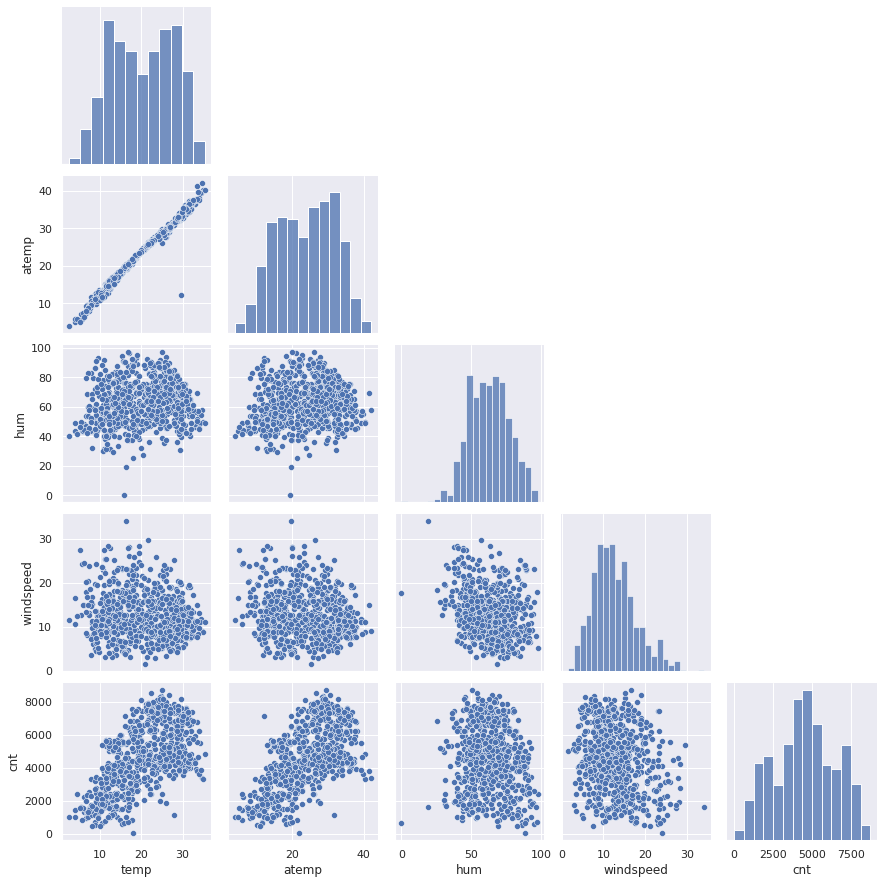

In [514]:
plt.figure(figsize=(20,7),dpi=150)
sns.pairplot(num_df,corner=True)

##### Observation on barplot:

    1. Looks like there is some kind of linear relationship between 'temp' ,'atemp' & 'cnt'
    

<AxesSubplot:>

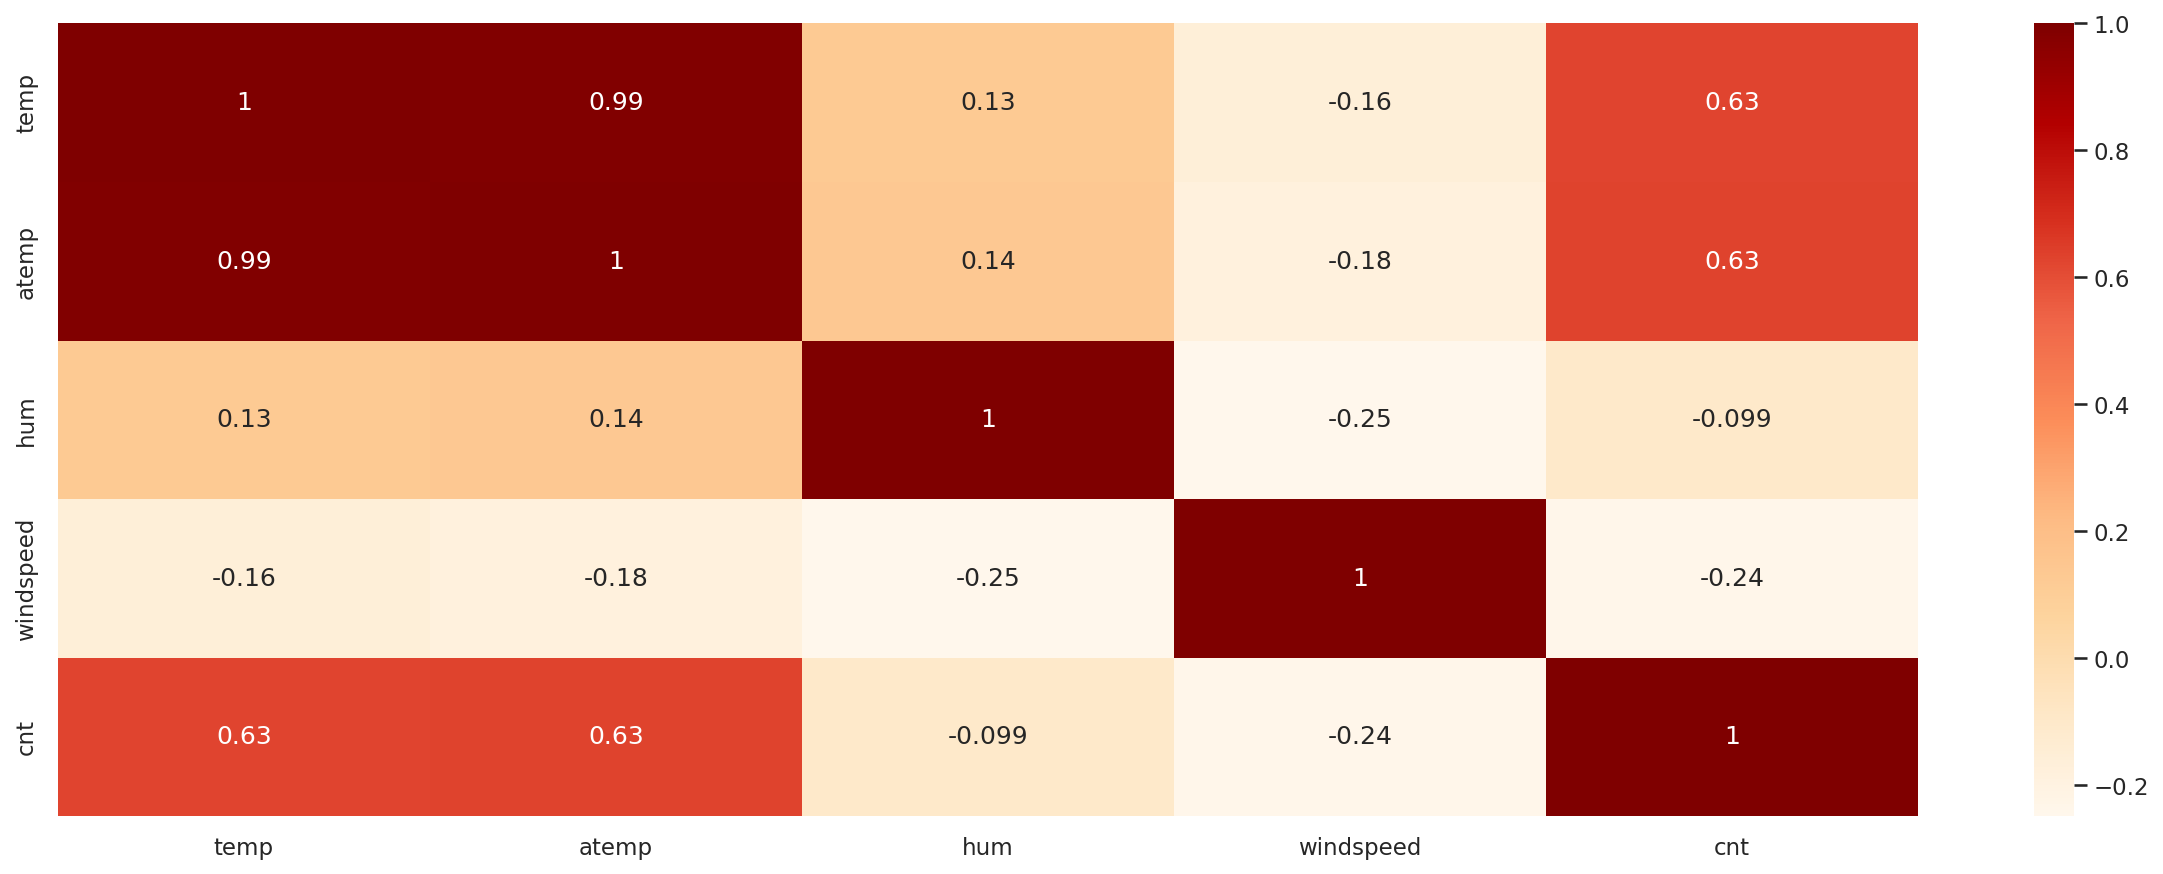

In [515]:
plt.figure(figsize=(20,7),dpi=150)

sns.heatmap(num_df.corr(),annot = True, cmap="OrRd")

In [516]:
def cat_feature_details(df):
    cols=df.columns
    
    for col in cols:
        print("\n==============================================================")
        print("                   FEATURE: {}          ".format(col.upper()))
        print("==============================================================")
        
        
        
        #nulls
        
        print('\n-: NULLS :-\n')
        nulls=df[col].isnull().sum()
        pernulls=(nulls/(len(df[col])))*100
        print(">> {} % Null values \n(i.e Out of {} instaces, there are {} Number of null values)".format(pernulls,len(df[col]),nulls))
        
        print("\n----------")
        
        #uniques
        
        print('\n-: UNIQUES :-\n')
        nuniqs=df[col].nunique()
        print(">> {} Total unique values".format(nuniqs))
        
        uniqs=df[col].unique()
        print("\n>> Unique values are:\n")
        for i in range(len(uniqs)):
            print(i+1,'-',uniqs[i])

       

In [517]:
cat_feature_details(cat_df_obj)


                   FEATURE: SEASON          

-: NULLS :-

>> 0.0 % Null values 
(i.e Out of 730 instaces, there are 0 Number of null values)

----------

-: UNIQUES :-

>> 4 Total unique values

>> Unique values are:

1 - springer
2 - summer
3 - fall
4 - winter

                   FEATURE: YR          

-: NULLS :-

>> 0.0 % Null values 
(i.e Out of 730 instaces, there are 0 Number of null values)

----------

-: UNIQUES :-

>> 2 Total unique values

>> Unique values are:

1 - 2018
2 - 2019

                   FEATURE: MNTH          

-: NULLS :-

>> 0.0 % Null values 
(i.e Out of 730 instaces, there are 0 Number of null values)

----------

-: UNIQUES :-

>> 12 Total unique values

>> Unique values are:

1 - 1
2 - 2
3 - 3
4 - 4
5 - 5
6 - 6
7 - 7
8 - 8
9 - 9
10 - 10
11 - 11
12 - 12

                   FEATURE: HOLIDAY          

-: NULLS :-

>> 0.0 % Null values 
(i.e Out of 730 instaces, there are 0 Number of null values)

----------

-: UNIQUES :-

>> 2 Total unique values

>> Uniq

#### Feature Engineering

In [518]:
df=pd.read_csv('../input/bike-sharing-dataset/day.csv')

In [519]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [520]:
df=df.drop(['dteday','instant','casual','registered'],axis=1)

In [521]:
num_df=df[['temp','atemp','hum','windspeed']]

In [522]:
cols=num_df.columns

In [523]:
def numerical_feature_details(df):
    
    cols=df.columns
    
    for col in cols:
        print("\n==============================================================")
        print("                   FEATURE: {}          ".format(col.upper()))
        print("==============================================================")
        
        
        
        #nulls
        
        print('\n-: NULLS :-\n')
        nulls=df[col].isnull().sum()
        pernulls=(nulls/(len(df[col])))*100
        print("{} % Null values \n(i.e Out of {} instaces, there are {} Number of null values)".format(pernulls,len(df[col]),nulls))
        
        print("\n----------")
        
        #uniques
        
        print('\n-: UNIQUES :-\n')
        nuniqs=df[col].nunique()
        print("{} Total unique values".format(nuniqs))
        
        
        print("\n----------")
        #outliers
        print('\n-: OUTLIERS :-\n')
        
        
        q75,q25=np.percentile(df[col],[75,25])
        iqr=np.round(q75-q25,3)
        upperlim=np.round(q75+(1.5*iqr),3)
        lowerlim=np.round(q25-(1.5*iqr),3)
        
        print("Instances above Upper Limit are: ",len(df[df[col]>upperlim]))
        print("Instances below Lower Limit are: ",len(df[df[col]<lowerlim]))
        
        print('\n')
    
        print("25th Percentile is: ",q25)
        print("75th Percentile is: ",q75)
        
        print("Inter Quartile range is: ",iqr)
        
        print("Upper limit is: ", upperlim)
        print("Lower limit is: ", lowerlim)
        
        
        print('\n')
        
        

In [524]:
numerical_feature_details(num_df)


                   FEATURE: TEMP          

-: NULLS :-

0.0 % Null values 
(i.e Out of 730 instaces, there are 0 Number of null values)

----------

-: UNIQUES :-

498 Total unique values

----------

-: OUTLIERS :-

Instances above Upper Limit are:  0
Instances below Lower Limit are:  0


25th Percentile is:  13.81188525
75th Percentile is:  26.88061475
Inter Quartile range is:  13.069
Upper limit is:  46.484
Lower limit is:  -5.792



                   FEATURE: ATEMP          

-: NULLS :-

0.0 % Null values 
(i.e Out of 730 instaces, there are 0 Number of null values)

----------

-: UNIQUES :-

689 Total unique values

----------

-: OUTLIERS :-

Instances above Upper Limit are:  0
Instances below Lower Limit are:  0


25th Percentile is:  16.8897125
75th Percentile is:  30.445774999999998
Inter Quartile range is:  13.556
Upper limit is:  50.78
Lower limit is:  -3.444



                   FEATURE: HUM          

-: NULLS :-

0.0 % Null values 
(i.e Out of 730 instaces, there ar

In [525]:
#converting catagorical columns into strings

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [527]:
categorical_df=df.select_dtypes(include='object')

In [528]:
cat_df_obj

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,springer,2018,1,No holiday,6,Non_working_day,Mist
1,springer,2018,1,No holiday,0,Non_working_day,Mist
2,springer,2018,1,No holiday,1,workingday,Clear
3,springer,2018,1,No holiday,2,workingday,Clear
4,springer,2018,1,No holiday,3,workingday,Clear
...,...,...,...,...,...,...,...
725,springer,2019,12,No holiday,4,workingday,Mist
726,springer,2019,12,No holiday,5,workingday,Mist
727,springer,2019,12,No holiday,6,Non_working_day,Mist
728,springer,2019,12,No holiday,0,Non_working_day,Clear


In [529]:
dummied_cat_df=pd.get_dummies(cat_df_obj,drop_first=True)

In [530]:
dummied_cat_df

,season_springer,season_summer,season_winter,yr_2019,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,...,holiday_No holiday,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_workingday,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
726,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,1
727,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
728,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [531]:
numerical_df=df[['temp','atemp','hum','windspeed','cnt']]

In [532]:
numerical_df

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114
726,10.386653,12.75230,59.0000,10.416557,3095
727,10.386653,12.12000,75.2917,8.333661,1341
728,10.489153,11.58500,48.3333,23.500518,1796


In [533]:
df_with_dummies=pd.concat([dummied_cat_df,numerical_df],axis=1)

In [534]:
df_with_dummies.head()

,season_springer,season_summer,season_winter,yr_2019,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,...,weekday_5,weekday_6,workingday_workingday,weathersit_Light Snow,weathersit_Mist,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,9.305237,11.46350,43.6957,12.522300,1600


---------------
### Linear Regression model

In [535]:
#Lets separate dependant and independant variables:

X=df_with_dummies.drop('cnt',axis=1)

In [536]:
y=df_with_dummies['cnt']

In [537]:
#Lets split the data into train and test
from sklearn.model_selection import train_test_split

In [538]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [539]:
#lets scale the values:

from sklearn.preprocessing import StandardScaler

In [540]:
scaler=StandardScaler()

In [541]:
scaler.fit(X_train)

StandardScaler()

In [542]:
X_train=scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [543]:
from sklearn.linear_model import LinearRegression

In [544]:
linear_regression_model=LinearRegression()

In [545]:
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [546]:
predicted_y_lrm=linear_regression_model.predict(X_test)

In [547]:
residual=y_test-predicted_y_lrm

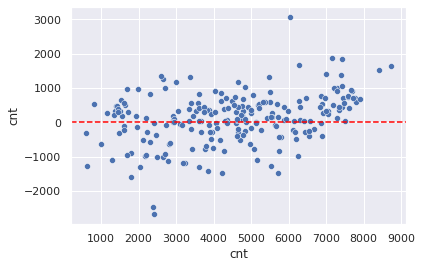

In [548]:
#plotting residuals against y_test to check if there is visible pattern 
sns.scatterplot(x=y_test,y=residual)
plt.axhline(y=0, ls='--',color='red')

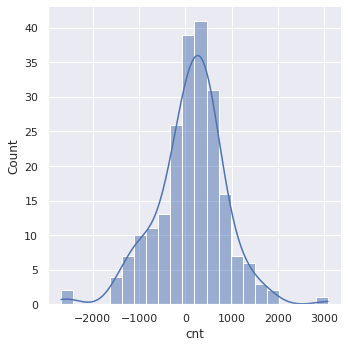

In [549]:
sns.displot(residual, kde=True)

In [550]:
# residuals looks evenly distributed also there is not identifiable pattern in scatterplot

In [551]:
# lets check errors:

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [552]:
MAE_lrm=mean_absolute_error(y_test,predicted_y_lrm)
MSE_lrm=mean_squared_error(y_test,predicted_y_lrm)
RMSE_lrm=np.sqrt(mean_squared_error(y_test,predicted_y_lrm))

In [553]:
MAE_lrm

568.1966354115773

In [554]:
MSE_lrm

562083.5568941025

In [555]:
RMSE_lrm

749.722319858561

In [556]:
linear_regression_model.score(X_test,y_test)

0.848177370024449

In [557]:
linear_regression_model.score(X_train,y_train)

0.8390699269426836

In [558]:
linear_regression_model.coef_

array([-3.04599720e+02,  8.15962181e+01,  3.53435515e+02,  1.01195816e+03,
        1.11998352e+02,  2.98751731e+00, -4.49202297e+01,  4.54730359e+01,
        1.78850424e+02,  1.50032527e+02,  1.91125581e+02,  1.34451414e+02,
        5.36622351e+01,  1.61401335e+02,  2.90538543e+02, -3.04422789e+15,
       -6.56283563e+15, -6.41214395e+15, -6.37339197e+15, -6.81101263e+15,
       -6.25441827e+15,  1.74491499e+02,  8.71996958e+15, -2.92237505e+02,
       -1.87185011e+02,  1.87394206e+02,  6.26962995e+02, -2.44236158e+02,
       -2.42494128e+02])

In [559]:
df_with_dummies.head()

,season_springer,season_summer,season_winter,yr_2019,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,...,weekday_5,weekday_6,workingday_workingday,weathersit_Light Snow,weathersit_Mist,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,9.305237,11.46350,43.6957,12.522300,1600


In [560]:
#Lets separate dependant and independant variables:

X=df_with_dummies.drop('cnt',axis=1)

In [561]:
y=df_with_dummies['cnt']

In [562]:
#Lets split the data into train and test
from sklearn.model_selection import train_test_split

In [563]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [564]:
#lets scale the values:

from sklearn.preprocessing import StandardScaler

In [565]:
scaler=StandardScaler()

In [566]:
scaler.fit(X_train)

StandardScaler()

In [567]:
X_train=scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [568]:
from sklearn.linear_model import LinearRegression

In [569]:
linear_regression_model=LinearRegression()

In [570]:
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [571]:
predicted_y_lrm=linear_regression_model.predict(X_test)

In [572]:
residual=y_test-predicted_y_lrm

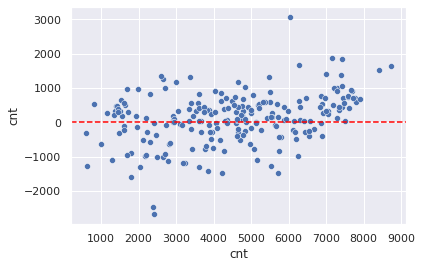

In [573]:
#plotting residuals against y_test to check if there is visible pattern 
sns.scatterplot(x=y_test,y=residual)
plt.axhline(y=0, ls='--',color='red')

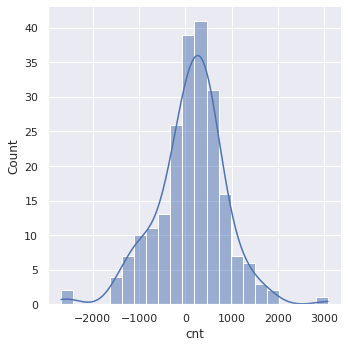

In [574]:
sns.displot(residual, kde=True)

In [575]:
# residuals looks evenly distributed also there is not identifiable pattern in scatterplot

In [576]:
# lets check errors:

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [577]:
MAE_lrm=mean_absolute_error(y_test,predicted_y_lrm)
MSE_lrm=mean_squared_error(y_test,predicted_y_lrm)
RMSE_lrm=np.sqrt(mean_squared_error(y_test,predicted_y_lrm))

In [578]:
MAE_lrm

568.1966354115773

In [579]:
MSE_lrm

562083.5568941025

In [580]:
RMSE_lrm

749.722319858561

In [581]:
linear_regression_model.score(X_test,y_test)

0.848177370024449

In [582]:
u=((y_test - predicted_y_lrm)** 2).sum()
v=((y_test - y_test.mean()) ** 2).sum()
score= 1-(u/v)

In [583]:
score

0.848177370024449

In [584]:
linear_regression_model.score(X_train,y_train)

0.8390699269426836

In [585]:
predicted_y_train_lrm=linear_regression_model.predict(X_train)

In [586]:
u=((y_train - predicted_y_train_lrm)** 2).sum()
v=((y_train - y_train.mean()) ** 2).sum()
score= 1-(u/v)

In [587]:
score

0.8390699269426836

In [588]:
X.head()

,season_springer,season_summer,season_winter,yr_2019,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,...,weekday_4,weekday_5,weekday_6,workingday_workingday,weathersit_Light Snow,weathersit_Mist,temp,atemp,hum,windspeed
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,8.050924,9.47025,43.7273,16.636703
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,8.200000,10.60610,59.0435,10.739832
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,9.305237,11.46350,43.6957,12.522300


In [589]:
linear_regression_model.coef_

array([-3.04599720e+02,  8.15962181e+01,  3.53435515e+02,  1.01195816e+03,
        1.11998352e+02,  2.98751731e+00, -4.49202297e+01,  4.54730359e+01,
        1.78850424e+02,  1.50032527e+02,  1.91125581e+02,  1.34451414e+02,
        5.36622351e+01,  1.61401335e+02,  2.90538543e+02, -3.04422789e+15,
       -6.56283563e+15, -6.41214395e+15, -6.37339197e+15, -6.81101263e+15,
       -6.25441827e+15,  1.74491499e+02,  8.71996958e+15, -2.92237505e+02,
       -1.87185011e+02,  1.87394206e+02,  6.26962995e+02, -2.44236158e+02,
       -2.42494128e+02])

In [590]:
print("TRAIN score of Linear Regression Model is: {}% ".format(np.round((linear_regression_model.score(X_train,y_train)*100),3)))
print("TEST score of Linear Regression Model is: {}% ".format(np.round((linear_regression_model.score(X_test,y_test)*100),3)))
print("------------")
print("Mean Absolute Error with Linear Regression Model is: ",np.round(MAE_lrm,4))
print("Mean Squared Error with Linear Regression Model is: ",np.round(MSE_lrm,4))
print("Root Mean Squared Error with Linear Regression Model is: ",np.round(RMSE_lrm,4))

TRAIN score of Linear Regression Model is: 83.907% 
TEST score of Linear Regression Model is: 84.818% 
------------
Mean Absolute Error with Linear Regression Model is:  568.1966
Mean Squared Error with Linear Regression Model is:  562083.5569
Root Mean Squared Error with Linear Regression Model is:  749.7223


### Polynomial Regression

In [591]:
#converting continuous features into polynomial features:
#numerical_df_poly=numerical_df.drop(['casual','registered','cnt'],axis=1)

In [592]:
numerical_df_poly=numerical_df.drop('cnt',axis=1)
numerical_df_poly

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300
...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911
726,10.386653,12.75230,59.0000,10.416557
727,10.386653,12.12000,75.2917,8.333661
728,10.489153,11.58500,48.3333,23.500518


In [593]:
from sklearn.preprocessing import PolynomialFeatures

In [594]:
poly_converter=PolynomialFeatures(degree=2,include_bias=False)

In [595]:
poly_features=poly_converter.fit_transform(numerical_df_poly)

In [596]:
#creating dataframe of poly features
df_num_poly_features=pd.DataFrame(poly_features)

In [597]:
df_num_poly_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.110847,18.18125,80.5833,10.749882,199.116003,256.552837,1137.098617,151.689940,330.557852,1465.105123,195.446292,6493.668239,866.260966,115.559963
1,14.902598,17.68695,69.6087,16.652113,222.087427,263.581506,1037.350473,248.159746,312.828200,1231.165596,294.525090,4845.371116,1159.131938,277.292867
2,8.050924,9.47025,43.7273,16.636703,64.817377,76.244263,352.045169,133.940831,89.685635,414.108463,157.553737,1912.076765,727.478103,276.779887
3,8.200000,10.60610,59.0435,10.739832,67.240000,86.970020,484.156700,88.066622,112.489357,626.221265,113.907732,3486.134892,634.117271,115.343991
4,9.305237,11.46350,43.6957,12.522300,86.587436,106.670584,406.598844,116.522969,131.411832,500.905657,143.549386,1909.314198,547.170664,156.807997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,108.594052,118.090080,680.394816,244.461722,128.416490,739.892074,265.838725,4263.006089,1531.672179,550.320505
726,10.386653,12.75230,59.0000,10.416557,107.882561,132.453715,612.812527,108.193163,162.621155,752.385700,132.835060,3481.000000,614.576863,108.504660
727,10.386653,12.12000,75.2917,8.333661,107.882561,125.886234,782.028762,86.558845,146.894400,912.535404,101.003971,5668.840089,627.455504,69.449906
728,10.489153,11.58500,48.3333,23.500518,110.022331,121.516838,506.975379,246.500529,134.212225,559.941281,272.253501,2336.107889,1135.857587,552.274346


In [598]:
df_poly_features=pd.concat([dummied_cat_df,df_num_poly_features],axis=1)

In [599]:
df_poly_features

,season_springer,season_summer,season_winter,yr_2019,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,...,4,5,6,7,8,9,10,11,12,13
0,1,0,0,0,0,0,0,0,0,0,...,199.116003,256.552837,1137.098617,151.689940,330.557852,1465.105123,195.446292,6493.668239,866.260966,115.559963
1,1,0,0,0,0,0,0,0,0,0,...,222.087427,263.581506,1037.350473,248.159746,312.828200,1231.165596,294.525090,4845.371116,1159.131938,277.292867
2,1,0,0,0,0,0,0,0,0,0,...,64.817377,76.244263,352.045169,133.940831,89.685635,414.108463,157.553737,1912.076765,727.478103,276.779887
3,1,0,0,0,0,0,0,0,0,0,...,67.240000,86.970020,484.156700,88.066622,112.489357,626.221265,113.907732,3486.134892,634.117271,115.343991
4,1,0,0,0,0,0,0,0,0,0,...,86.587436,106.670584,406.598844,116.522969,131.411832,500.905657,143.549386,1909.314198,547.170664,156.807997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,0,1,0,0,0,...,108.594052,118.090080,680.394816,244.461722,128.416490,739.892074,265.838725,4263.006089,1531.672179,550.320505
726,1,0,0,1,0,0,1,0,0,0,...,107.882561,132.453715,612.812527,108.193163,162.621155,752.385700,132.835060,3481.000000,614.576863,108.504660
727,1,0,0,1,0,0,1,0,0,0,...,107.882561,125.886234,782.028762,86.558845,146.894400,912.535404,101.003971,5668.840089,627.455504,69.449906
728,1,0,0,1,0,0,1,0,0,0,...,110.022331,121.516838,506.975379,246.500529,134.212225,559.941281,272.253501,2336.107889,1135.857587,552.274346


In [600]:
#lets sepearate dependent and independant variables:
X=df_poly_features
y=df_with_dummies['cnt']

In [601]:
#Lets convert features into polynomial features:

#from sklearn.preprocessing import PolynomialFeatures

In [602]:
#poly_converter=PolynomialFeatures(degree=2,include_bias=False)

In [603]:
#poly_features=poly_converter.fit_transform(X)

In [604]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [605]:
#scaling
scaler=StandardScaler()

In [606]:
scaler.fit(X_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


StandardScaler()

In [607]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [608]:
linear_regression_model_with_polyfeatures=LinearRegression()

In [609]:
linear_regression_model_with_polyfeatures.fit(X_train,y_train)

LinearRegression()

In [610]:
predicted_y_lrm_pf= linear_regression_model_with_polyfeatures.predict(X_test)

In [611]:
#lets calculate residuals
residual_pf=y_test-predicted_y_lrm_pf

In [612]:
residual_pf.max()

35646.66915394046

In [613]:
#lets plot residuals to check pattern and distribution

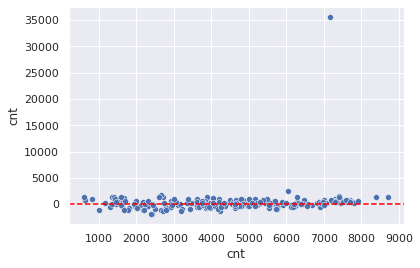

In [614]:
sns.scatterplot(x=y_test,y=residual_pf)
plt.axhline(y=0,ls='--',color='red')

<AxesSubplot:xlabel='cnt', ylabel='Density'>

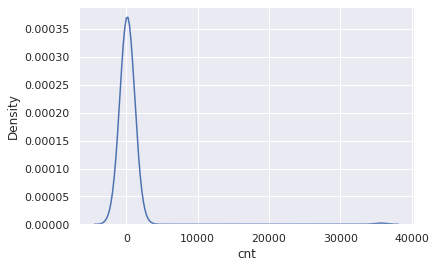

In [615]:
sns.kdeplot(residual_pf)

In [616]:
#residuals looks evenly distributed, also there is no pattern in scatterplot

In [617]:
MAE_lrm_pf=mean_absolute_error(y_test,predicted_y_lrm_pf)
MSE_lrm_pf=mean_squared_error(y_test,predicted_y_lrm_pf)
RMSE_lrm_pf=np.sqrt(mean_squared_error(y_test,predicted_y_lrm_pf))

In [618]:
MAE_lrm_pf

682.7487818396569

In [619]:
MSE_lrm_pf

6262608.6392307915

In [620]:
RMSE_lrm_pf

2502.520457305153

In [621]:
linear_regression_model_with_polyfeatures.score(X_train,y_train)

0.8755467009197779

In [622]:
linear_regression_model_with_polyfeatures.score(X_test,y_test)

-0.691573614729952

In [623]:
print("TRAIN score of Linear Regression Model (with Polynomial features) is: {}% ".format(np.round((linear_regression_model_with_polyfeatures.score(X_train,y_train)*100),3)))
print("TEST score of Linear Regression Model (with Polynomial features) is: {}% ".format(np.round((linear_regression_model_with_polyfeatures.score(X_test,y_test)*100),3)))
print("------------")
print("Mean Absolute Error with Linear Regression Model (with Polynomial features) is: ",np.round(MAE_lrm_pf,4))
print("Mean Squared Error with Linear Regression Model (with Polynomial features) is: ",np.round(MSE_lrm_pf,4))
print("Root Mean Squared Error with Linear Regression Model (with Polynomial features) is: ",np.round(RMSE_lrm_pf,4))

TRAIN score of Linear Regression Model (with Polynomial features) is: 87.555% 
TEST score of Linear Regression Model (with Polynomial features) is: -69.157% 
------------
Mean Absolute Error with Linear Regression Model (with Polynomial features) is:  682.7488
Mean Squared Error with Linear Regression Model (with Polynomial features) is:  6262608.6392
Root Mean Squared Error with Linear Regression Model (with Polynomial features) is:  2502.5205


#### *Going for Polynomial is worst Choice!*

### Regularization

In [624]:
df_with_dummies.head()

,season_springer,season_summer,season_winter,yr_2019,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,...,weekday_5,weekday_6,workingday_workingday,weathersit_Light Snow,weathersit_Mist,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,9.305237,11.46350,43.6957,12.522300,1600


In [625]:
X=df.drop('cnt',axis=1)

In [626]:
y=df_with_dummies['cnt']

In [627]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [628]:
#scaling

scaler=StandardScaler()

In [629]:
scaler.fit(X_train)

StandardScaler()

In [630]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [631]:
from sklearn.linear_model import ElasticNet

In [632]:
elastic_net_model = ElasticNet(max_iter=10000000,tol=0.01)

In [633]:
param_grid={'alpha':[0.0001,0.001,0.1,0.5,1,10,50,75,100,150,200,500],'l1_ratio':[0.01,0.1,0.2,0.3,0.5,0.7,0.8,0.9,0.99,1]}

In [634]:
#Searching for right hyper parameters for Elastic Net model
from sklearn.model_selection import GridSearchCV

In [635]:
grid_model=GridSearchCV(estimator=elastic_net_model,param_grid=param_grid,cv=10,scoring='neg_root_mean_squared_error')

In [636]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000000, tol=0.01),
             param_grid={'alpha': [0.0001, 0.001, 0.1, 0.5, 1, 10, 50, 75, 100,
                                   150, 200, 500],
                         'l1_ratio': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9,
                                      0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [637]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=10000000, tol=0.01)

In [638]:
predicted_y_enm=grid_model.predict(X_test)

In [639]:
predicted_y_train_enm=grid_model.predict(X_train)

In [640]:
residual_enm=y_test-predicted_y_enm

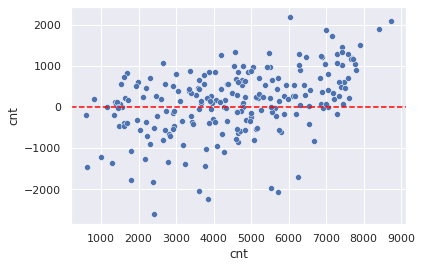

In [641]:
sns.scatterplot(x=y_test,y=residual_enm)
plt.axhline(y=0,ls='--',color='red')

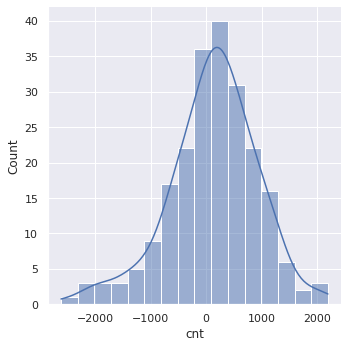

In [642]:
sns.displot(residual_enm,kde=True)

In [643]:
grid_model

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000000, tol=0.01),
             param_grid={'alpha': [0.0001, 0.001, 0.1, 0.5, 1, 10, 50, 75, 100,
                                   150, 200, 500],
                         'l1_ratio': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9,
                                      0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [644]:
#residuals looks evenly distributed

In [645]:
#Lets check errors:

MAE_enm=mean_absolute_error(y_test,predicted_y_enm)
MSE_enm=mean_squared_error(y_test,predicted_y_enm)
RMSE_enm=np.sqrt(mean_squared_error(y_test,predicted_y_enm))

In [646]:
def score(true,pred):
    
    u=((true - pred)** 2).sum()
    v=((true - pred.mean()) ** 2).sum()
    score= 1-(u/v)
    
    #formula of score is taken from: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    
    return np.round(score*100,2)
    
    

In [647]:
print("TRAIN score of Elastic Net Model (using GridSearch) is: {}% ".format(score(y_train,predicted_y_train_enm)))
print("TEST score of Elastic Net Model (using GridSearch) is: {}% ".format(score(y_test,predicted_y_enm)))
print("------------")
print("Mean Absolute Error with Elastic Net Model (using GridSearch) is: ",np.round(MAE_enm,4))
print("Mean Squared Error with Elastic Net Model (using GridSearch) is: ",np.round(MSE_enm,4))
print("Root Mean Squared Error with Elastic Net Model (using GridSearch) is: ",np.round(RMSE_enm,4))

TRAIN score of Elastic Net Model (using GridSearch) is: 78.95% 
TEST score of Elastic Net Model (using GridSearch) is: 82.5% 
------------
Mean Absolute Error with Elastic Net Model (using GridSearch) is:  619.3404
Mean Squared Error with Elastic Net Model (using GridSearch) is:  650468.9312
Root Mean Squared Error with Elastic Net Model (using GridSearch) is:  806.5165


In [648]:
grid_model.score(X_train,y_train)

-889.587250751228

In [649]:
grid_model.score(X_test,y_test)

-806.5165412117666

In [650]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=10000000, tol=0.01)

### LASSO Regression:

In [651]:
df_with_dummies.head()

,season_springer,season_summer,season_winter,yr_2019,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,...,weekday_5,weekday_6,workingday_workingday,weathersit_Light Snow,weathersit_Mist,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,9.305237,11.46350,43.6957,12.522300,1600


In [652]:
X=df_with_dummies.drop('cnt',axis=1)

In [653]:
y=df_with_dummies['cnt']

In [654]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [655]:
scaler=StandardScaler()

In [656]:
scaler.fit(X_train)

StandardScaler()

In [657]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [658]:
from sklearn.linear_model import Lasso

In [659]:
grid_lasso_model=Lasso(max_iter=1000000)

In [660]:
param_for_lasso={'alpha':[0.0001,0.001,0.01,0.1,1,2,3,4,5,10,15,20,25,50,100,200,500,1000]}

In [661]:
grid_for_lasso=GridSearchCV(estimator=grid_lasso_model,param_grid=param_for_lasso,cv=10,scoring='neg_root_mean_squared_error')

In [662]:
grid_for_lasso.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.126e+05, tolerance: 1.713e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(cv=10, estimator=Lasso(max_iter=1000000),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 10,
                                   15, 20, 25, 50, 100, 200, 500, 1000]},
             scoring='neg_root_mean_squared_error')

In [663]:
grid_for_lasso.best_estimator_

Lasso(alpha=20, max_iter=1000000)

In [664]:
lasso_model=Lasso(alpha=5)

In [665]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=5)

In [666]:
predicted_y_lasso=lasso_model.predict(X_test)

In [667]:
residual_lasso=y_test-predicted_y_lasso

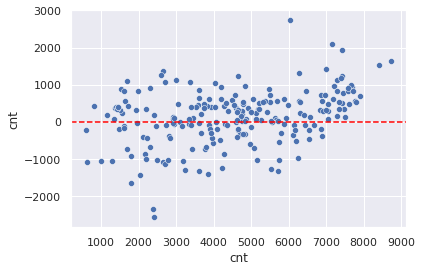

In [668]:
sns.scatterplot(x=y_test,y=residual_lasso)
plt.axhline(y=0,ls='--',color='red')

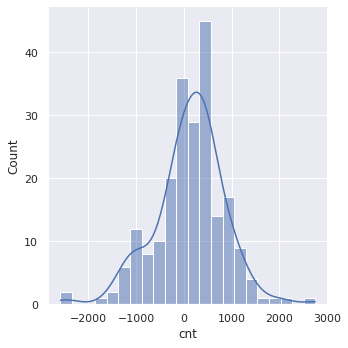

In [669]:
sns.displot(residual_lasso,kde=True)

In [670]:
lasso_model.score(X_test,y_test)

0.8531382440490907

In [671]:
lasso_model.score(X_train,y_train)

0.8426470115935778

In [672]:
MAE_lasso=mean_absolute_error(y_test,predicted_y_lasso)
MSE_lasso=mean_squared_error(y_test,predicted_y_lasso)
RMSE_lasso=np.sqrt(mean_squared_error(y_test,predicted_y_lasso))

In [673]:
print("TRAIN score of LASSO Regression Model is: {}% ".format(np.round((lasso_model.score(X_train,y_train)*100),3)))
print("TEST score of LASSO Regression Model is: {}% ".format(np.round((lasso_model.score(X_test,y_test)*100),3)))
print("------------")

print("Mean Absolute Error with Elastic Net Model (using GridSearch) is: ",np.round(MAE_lasso,4))
print("Mean Squared Error with Elastic Net Model (using GridSearch) is: ",np.round(MSE_lasso,4))
print("Root Mean Squared Error with Elastic Net Model (using GridSearch) is: ",np.round(RMSE_lasso,4))

TRAIN score of LASSO Regression Model is: 84.265% 
TEST score of LASSO Regression Model is: 85.314% 
------------
Mean Absolute Error with Elastic Net Model (using GridSearch) is:  560.8489
Mean Squared Error with Elastic Net Model (using GridSearch) is:  543717.219
Root Mean Squared Error with Elastic Net Model (using GridSearch) is:  737.3718


## Final Observation:-


#### Linear Regression Model:

    TRAIN score of Linear Regression Model is: 84.247% 
    TEST score of Linear Regression Model is: 84.715% 
    ------------
    Mean Absolute Error with Linear Regression Model is:  570.3478
    Mean Squared Error with Linear Regression Model is:  565899.9485
    Root Mean Squared Error with Linear Regression Model is:  752.2632
    

    
#### Elastic Net Model:

    TRAIN score of Elastic Net Model (using GridSearch) is: 78.64% 
    TEST score of Elastic Net Model (using GridSearch) is: 82.12% 
    ------------
    Mean Absolute Error with Elastic Net Model (using GridSearch) is:  618.9182
    Mean Squared Error with Elastic Net Model (using GridSearch) is:  664418.3196
    Root Mean Squared Error with Elastic Net Model (using GridSearch) is:  815.1186




#### Polynomial Regression:


    TRAIN score of Linear Regression Model (with Polynomial features) is: 87.436% 
    TEST score of Linear Regression Model (with Polynomial features) is: -120.094% 
    ------------
    Mean Absolute Error with Linear Regression Model (with Polynomial features) is:  719.395
    Mean Squared Error with Linear Regression Model (with Polynomial features) is:  8148414.79
    Root Mean Squared Error with Linear Regression Model (with Polynomial features) is:  2854.5428
    
    
    

#### LASSO Regression:


    TRAIN score of LASSO Regression Model is: 84.164% 
    TEST score of LASSO Regression Model is: 84.872% 
    ------------
    Mean Absolute Error with Elastic Net Model (using GridSearch) is:  569.1683
    Mean Squared Error with Elastic Net Model (using GridSearch) is:  560069.6845
    Root Mean Squared Error with Elastic Net Model (using GridSearch) is:  748.378